# Mapping the phase space of a jet

## Unfolding the $N$-subjettiness basis in semileptonic $t\bar{t}$ events at $\sqrt{s} = 13$ TeV

#### Firstly , import the ROOT data analysis framework which will be used to read the data files and unfold the final result. 

In [1]:
import ROOT
import array as array
import os
import glob
import ROOT
from ROOT import TH1D, TH2D, TTree,TFile
from random import gauss
import numpy as np
import root_numpy as rtnpy
import h5py
from awkward import JaggedArray, Table
import matplotlib.pyplot as plt
import seaborn as sns

Welcome to JupyROOT 6.18/00


In [2]:
lumi = 5.75+2.57+4.24+4.03+3.11+7.57+8.65 #B+C+D+E+F+G+H
print "2016 Single Muon dataset luminosity:%0.2f"%(lumi)

2016 Single Muon dataset luminosity:35.92


In [3]:
systs = ['Jmr', 'Jms', 'pileup', 'JesTotal', 'Lumi', 'lhaPDF', 'Jer']

uncert_colors = [ 4 ,  4 , ROOT.kCyan +1 ,2 ,      ROOT.kYellow+3,    ROOT.kMagenta ,  2 , ROOT.kBlack ,ROOT.kBlack ,    ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ,ROOT.kViolet+3 ,  ROOT.kRed ,   ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ,   ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ,ROOT.kViolet+3 ,  ROOT.kRed ,   ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ]
uncert_lines = [ 5,8,7,3,    5,    6,8,1, 2, 4, 5, 1, 7, 8, 1, 7,7,4,4,5,2,1,3, 2, 4, 5, 1, 7, 8, 1]

# $\tau_{2}^{(0.5)}$ unfolding with background subtraction + purity&stability study [w/ E-scheme recombination+excl. $k_T$ axes]


#### Below the MC and Data events are read from ROOT trees which only contain events meeting the selection criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__ and thereafter in the nSubExtractor class

In [5]:
from nSubExtractor_old import nSubExtractor_old as nSubExtractor

### Loading datasets of $N$-subjettiness bases measured with (default: " " ) $E$-scheme recombination and excl. lT axes (please specifiy  "WTA_kT" or "OP_kT" in the axisdef option of the nSubExtractor)

In [5]:
a = nSubExtractor(isMC=1, axisdef="", sample="TTbar/2")
TTbarMG_dataset, TTbarMG_reco_nSub_basis, TTbarMG_gen_nSub_basis, TTbarMG_weights = a.sample_loader()

print TTbarMG_reco_nSub_basis.shape, TTbarMG_weights.shape

(6270, 21) (6270, 2)


Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


In [6]:
a = nSubExtractor(isMC=1, axisdef="", sample="TTbar/1")
TTbar_dataset, TTbar_reco_nSub_basis, TTbar_gen_nSub_basis, TTbar_weights  = a.sample_loader()

print TTbar_reco_nSub_basis.shape, TTbar_weights.shape

(43107, 21) (43107, 2)


In [7]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/1")
ST1_dataset, ST1_reco_nSub_basis, ST1_gen_nSub_basis, ST1_weights  = a.sample_loader()
print ST1_reco_nSub_basis.shape, ST1_weights.shape

(900, 21) (900, 2)


In [8]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/2")
ST2_dataset, ST2_reco_nSub_basis, ST2_gen_nSub_basis, ST2_weights  = a.sample_loader()
print ST2_reco_nSub_basis.shape, ST2_weights.shape

(1988, 21) (1988, 2)


In [9]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/3")
ST3_dataset, ST3_reco_nSub_basis, ST3_gen_nSub_basis, ST3_weights  = a.sample_loader()
print ST3_reco_nSub_basis.shape, ST3_weights.shape

(594, 21) (594, 2)


In [10]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/4")
ST4_dataset, ST4_reco_nSub_basis, ST4_gen_nSub_basis, ST4_weights  = a.sample_loader()
print ST4_reco_nSub_basis.shape, ST4_weights.shape

(617, 21) (617, 2)


In [11]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/5")
ST5_dataset, ST5_reco_nSub_basis, ST5_gen_nSub_basis, ST5_weights  = a.sample_loader()
print ST5_reco_nSub_basis.shape, ST5_weights.shape

(69, 21) (69, 2)


In [12]:
a = nSubExtractor(isMC=1, axisdef="", sample="Wjets/2")
Wjets_dataset, Wjets_reco_nSub_basis, Wjets_gen_nSub_basis, Wjets_weights = a.sample_loader()
print Wjets_reco_nSub_basis.shape, Wjets_weights.shape

(207, 21) (207, 3)


In [13]:
a = nSubExtractor(isMC=0, axisdef="", sample="Data")
data_dataset, data_nSub_basis,  = a.sample_loader()
print data_nSub_basis.shape

(16482, 21)


In [14]:
weight_ST1 = (80.95*0.322*lumi*1000.)/(38811017.)*np.ones(ST1_weights.shape[0])*ST1_weights[:,0]*ST1_weights[:,1]*0.8
weight_ST2 = (0.322*136.02*lumi*1000.)/(66960888.)*np.ones(ST2_weights.shape[0])*ST2_weights[:,0]*ST2_weights[:,1]*0.8
weight_ST3 = (35.6*lumi*1000.)/(998276.)*np.ones(ST3_weights.shape[0])*ST3_weights[:,0]*ST3_weights[:,1]*0.8
weight_ST4 = (35.6*lumi*1000.)/(992024.)*np.ones(ST4_weights.shape[0])*ST4_weights[:,0]*ST4_weights[:,1]*0.8
weight_ST5 = (10.12*lumi*1000.)/(2989199.)*np.ones(ST5_weights.shape[0])*ST5_weights[:,0]*ST5_weights[:,1]*0.8
weight_TTbar = (831.76*lumi*1000.)/76915549.*np.ones(TTbar_weights.shape[0])*TTbar_weights[:,0]*TTbar_weights[:,1]*0.8
weight_Wjets = ((60781.5*lumi*1000.)*(Wjets_weights[:,2]/abs(Wjets_weights[:,2][0]))/158307515.0)*Wjets_weights[:,0]*Wjets_weights[:,1]*0.8 
weight_data = 1.0*np.ones(data_nSub_basis.shape[0])

#print lumi, weight_Wjets
#print TTbar_weights[:,0]

In [15]:
lenW = Wjets_reco_nSub_basis.shape[0]
lenST = ST1_reco_nSub_basis.shape[0]+ST1_reco_nSub_basis.shape[0]+ST2_reco_nSub_basis.shape[0]+ST4_reco_nSub_basis.shape[0]+ST5_reco_nSub_basis.shape[0]
lenbkg = lenW+lenST
print lenbkg

4681


In [16]:
bkg_reco_nSub_basis = np.concatenate((Wjets_reco_nSub_basis, ST1_reco_nSub_basis, ST2_reco_nSub_basis, ST3_reco_nSub_basis, ST4_reco_nSub_basis, ST5_reco_nSub_basis))

In [17]:
lenW = Wjets_gen_nSub_basis.shape[0]
lenST = ST1_gen_nSub_basis.shape[0]+ST1_gen_nSub_basis.shape[0]+ST2_gen_nSub_basis.shape[0]+ST4_gen_nSub_basis.shape[0]+ST5_gen_nSub_basis.shape[0]
lenbkg = lenW+lenST
print lenbkg

4681


In [18]:
bkg_gen_nSub_basis = np.concatenate((Wjets_gen_nSub_basis, ST1_gen_nSub_basis, ST2_gen_nSub_basis, ST3_gen_nSub_basis, ST4_gen_nSub_basis, ST5_gen_nSub_basis))

# Unfolding $\tau_{3}^{(0.5)}$ with background subtraction

In [19]:
Wjets_gen_tau3_0p5 = Wjets_gen_nSub_basis[:,6]

ST1_gen_tau3_0p5 = ST1_gen_nSub_basis[:,6]

ST2_gen_tau3_0p5 = ST2_gen_nSub_basis[:,6]

ST3_gen_tau3_0p5 = ST3_gen_nSub_basis[:,6]

ST4_gen_tau3_0p5 = ST4_gen_nSub_basis[:,6]

ST5_gen_tau3_0p5 = ST5_gen_nSub_basis[:,6]

TTbar_gen_tau3_0p5 = TTbar_gen_nSub_basis[:,6]

In [20]:
Wjets_reco_tau3_0p5 = Wjets_reco_nSub_basis[:,6]

ST1_reco_tau3_0p5 = ST1_reco_nSub_basis[:,6]

ST2_reco_tau3_0p5 = ST2_reco_nSub_basis[:,6]

ST3_reco_tau3_0p5 = ST3_reco_nSub_basis[:,6]

ST4_reco_tau3_0p5 = ST4_reco_nSub_basis[:,6]

ST5_reco_tau3_0p5 = ST5_reco_nSub_basis[:,6]

TTbar_reco_tau3_0p5 = TTbar_reco_nSub_basis[:,6]

In [21]:
MC_sig_reco_tau3_0p5 = TTbar_reco_tau3_0p5
MC_sig_gen_tau3_0p5 = TTbar_gen_tau3_0p5

MC_bkg_reco_tau3_0p5 = np.concatenate((ST1_reco_tau3_0p5,ST2_reco_tau3_0p5,ST3_reco_tau3_0p5,ST4_reco_tau3_0p5,ST5_reco_tau3_0p5,Wjets_reco_tau3_0p5))
MC_bkg_gen_tau3_0p5 = np.concatenate((ST1_gen_tau3_0p5,ST2_gen_tau3_0p5,ST3_gen_tau3_0p5,ST4_gen_tau3_0p5,ST5_gen_tau3_0p5,Wjets_gen_tau3_0p5))

data_tau3_0p5 = data_nSub_basis[:,6]
weights_MC_sig = weight_TTbar
weights_MC_bkg = np.concatenate((weight_ST1,weight_ST2,weight_ST3,weight_ST4,weight_ST5,weight_Wjets))

Get the response matrix and input 1D distributions for unfolding.

In [22]:
print np.min(MC_sig_gen_tau3_0p5)
print np.min(MC_sig_reco_tau3_0p5)
print np.max(MC_sig_gen_tau3_0p5)
print np.max(MC_sig_reco_tau3_0p5), "\n"


print np.min(MC_bkg_gen_tau3_0p5)
print np.min(MC_bkg_reco_tau3_0p5)
print np.max(MC_bkg_gen_tau3_0p5)
print np.max(MC_bkg_reco_tau3_0p5), "\n"


print np.min(data_tau3_0p5)
print np.max(data_tau3_0p5)

0.005473632365465164
0.04230464622378349
0.5322859287261963
0.5292599201202393 

0.07592660933732986
0.05889412388205528
0.4643595516681671
0.4904743731021881 

0.02886856719851494
0.5442260503768921


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [23]:
gen_bins = np.array([x for x in np.linspace(num=7, start=0.11, stop=0.41)])
gen_bins = np.concatenate((np.array([0.,]), gen_bins, np.array([0.55,])))
print gen_bins, gen_bins.shape[0]

det_bins = np.array([x for x in np.linspace(num=13, start=0.11, stop=0.41)])
det_bins = np.concatenate((np.array([0.,0.055,]), det_bins, np.array([0.48, 0.55]),))
print det_bins, det_bins.shape[0]

[0.   0.11 0.16 0.21 0.26 0.31 0.36 0.41 0.55] 9
[0.    0.055 0.11  0.135 0.16  0.185 0.21  0.235 0.26  0.285 0.31  0.335
 0.36  0.385 0.41  0.48  0.55 ] 17


In [24]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

#### Fill histograms for sig and bkg. MC separately in this case (as one should!)

In [25]:
histMgenMC_bkg = ROOT.TH1D("histMgenMC_bkg", "histMgenMC_bkg; #tau_{3}^{(0.5)}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_bkg, MC_bkg_gen_tau3_0p5, weights=weights_MC_bkg)

histMdetMC_bkg = ROOT.TH1D("histMdetMC_bkg", "histMdetMC_bkg; #tau_{3}^{(0.5)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_bkg, MC_bkg_reco_tau3_0p5, weights=weights_MC_bkg)

histMgenMC_sig = ROOT.TH1D("histMgenMC_sig", "histMgenMC_sig; #tau_{3}^{(0.5)}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_sig, MC_sig_gen_tau3_0p5, weights=weights_MC_sig)

histMdetMC_sig = ROOT.TH1D("histMdetMC_sig", "histMdetMC_sig; #tau_{3}^{(0.5)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_sig, MC_sig_reco_tau3_0p5, weights=weights_MC_sig)

#histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{3}^{(0.5)}; Events/(0.02)", gen_bins.shape[0]-1, (gen_bins))
#fill_hist(histMgenData, TTbartruth_nSub_basis[:,4]/TTbartruth_nSub_basis[:,1])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{3}^{(0.5)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetData, data_tau3_0p5)

Set the X and Y axis labels

In [26]:
histMgenMC_bkg.SetTitle(";#tau_{3}^{(0.5)}(gen_bkg)")

histMdetMC_bkg.SetTitle(";#tau_{3}^{(0.5)}(det_bkg)")

histMgenMC_sig.SetTitle(";#tau_{3}^{(0.5)}(gen_sig)")

histMdetMC_sig.SetTitle(";#tau_{3}^{(0.5)}(det_sig)")

histMdetData.SetTitle(";#tau_{3}^{(0.5)}(data)")


Draw the variables at reco and gen level and for "data"

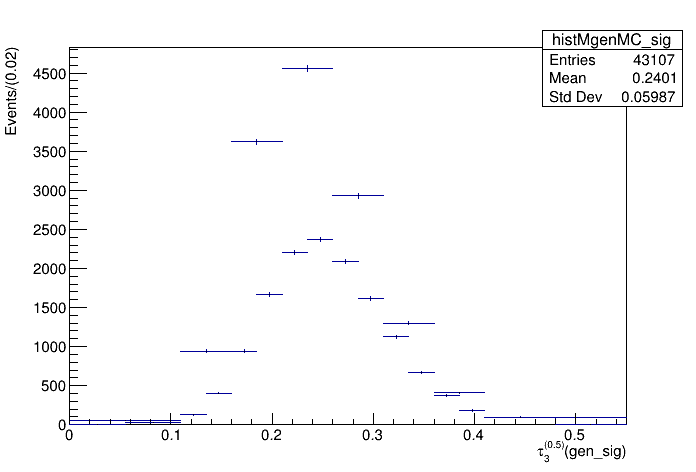

In [27]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
histMgenMC_sig.Draw("e")
histMdetMC_sig.Draw("e same")
c1.Draw()

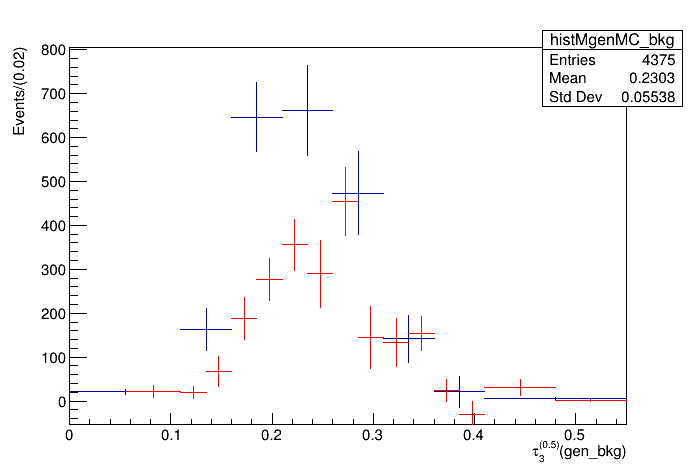

In [28]:
c1 = ROOT.TCanvas("chistMgenMC_bkg1", "chistMgenMC_bkg1")
histMgenMC_bkg.Draw("e")
histMdetMC_bkg.SetLineColor(ROOT.kRed)
histMdetMC_bkg.Draw("e same")
c1.Draw()

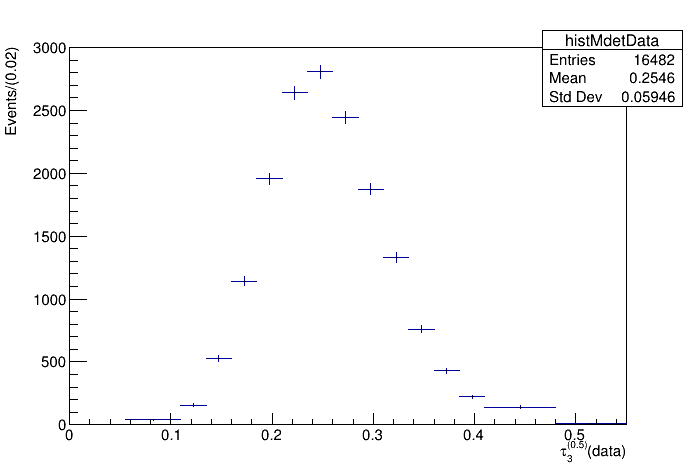

In [29]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
#histMgenData.Draw("e")
histMdetData.Draw("e ")
c1.Draw()

### Fill response matrix

In [30]:
response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
hist2Dfill = np.zeros((MC_sig_reco_tau3_0p5.shape[0], 2))
hist2Dfill[:,0] = MC_sig_reco_tau3_0p5.flatten()
hist2Dfill[:,1] = MC_sig_gen_tau3_0p5.flatten()
fill_hist(response, hist2Dfill, weights_MC_sig)
response.SetTitle("Nominal Response Matrix;#tau_{3}^{(0.5)}(det_sig);#tau_{3}^{(0.5)}(gen_sig)")

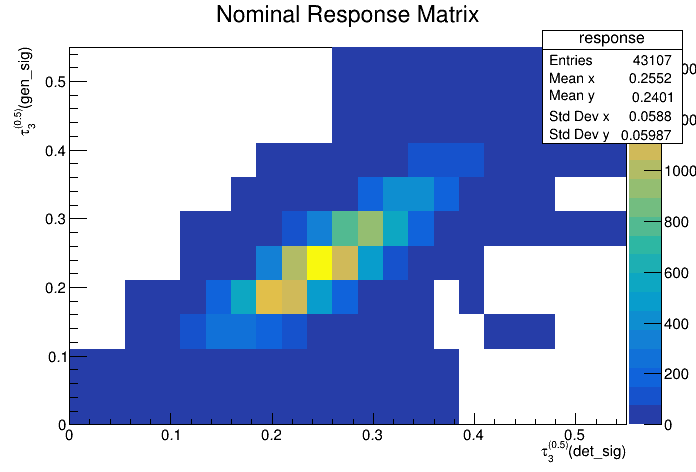

In [31]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

### Purity and Stability calculation

In [32]:
hMC_gen_bkg = ROOT.TH1D(histMgenMC_bkg)
#hMC_gen_bkg.Scale(1./norm_genMC_bkg)

hMC_reco_bkg = ROOT.TH1D(histMdetMC_bkg)
#hMC_reco_bkg.Scale(1./norm_recoMC_bkg)

hMC_gen_sig = ROOT.TH1D(histMgenMC_sig)
#hMC_gen_sig.Scale(1./norm_genMC_sig)

hMC_reco_sig = ROOT.TH1D(histMdetMC_sig)
#hMC_reco_sig.Scale(1./norm_recoMC_sig)

hMC_data = ROOT.TH1D(histMdetData)
#histMgenData.Scale(1./norm_genData)
#histMdetData.Scale(1./norm_detData)

'''
histMgenMC_bkg.Scale(1./norm_genMC_bkg)
histMdetMC_bkg.Scale(1./norm_recoMC_bkg)
histMgenMC_sig.Scale(1./norm_genMC_sig)
histMdetMC_sig.Scale(1./norm_recoMC_sig)

#histMgenData.Scale(1./norm_genData)
histMdetData.Scale(1./norm_detData)
''';

In [33]:
for i in xrange(0, histMdetMC_sig.GetNbinsX()+1):
    print i, hMC_reco_sig.GetBinLowEdge(i), hMC_reco_sig.GetBinContent(i)   
print "=========="
for i in xrange(0, hMC_gen_sig.GetNbinsX()+1):
    print i, hMC_gen_sig.GetBinLowEdge(i), hMC_gen_sig.GetBinContent(i)

0 -0.034375 0.0
1 0.0 0.698875485429
2 0.055 27.9365079736
3 0.11 127.306979654
4 0.135 406.783418097
5 0.16 939.096893035
6 0.185 1667.20760137
7 0.21 2200.38663281
8 0.235 2372.95716393
9 0.26 2088.00671085
10 0.285 1618.84403345
11 0.31 1127.49833483
12 0.335 669.726524284
13 0.36 370.659173725
14 0.385 183.338312109
15 0.41 96.7072012942
16 0.48 3.98326642254
0 -0.06875 0.0
1 0.0 54.6701049859
2 0.11 942.176843479
3 0.16 3618.37021138
4 0.21 4560.41600721
5 0.26 2930.67156839
6 0.31 1298.23858987
7 0.36 406.916385327
8 0.41 89.6779186721


In [34]:
purity = ROOT.TH1D("purity", "Purity and stability study; #tau_{3}^{(0.5)}; ",  gen_bins.shape[0]-1, (gen_bins))
stability = ROOT.TH1D("stability", "Purity and stability study; #tau_{3}^{(0.5)}; ",  gen_bins.shape[0]-1, (gen_bins))
efficiency = ROOT.TH1D("efficiency", "Purity and stability study; #tau_{3}^{(0.5)}; ",  gen_bins.shape[0]-1, (gen_bins))

### With python

We define purity as the fraction of reconstructed events that are generated in the same bin, 
and stability as the fraction of generated events that are reconstructed in the same
bin, divided by the overall reconstruction efficiency per bin. 

In [35]:
gen_arr = MC_sig_gen_tau3_0p5[:]
#print gen_arr[0:20]
#print gen_bins[0:-1]
gen_bin_index = np.digitize(gen_arr, gen_bins)
print gen_bin_index
#print gen_bin_index[0:20]

det_arr = MC_sig_reco_tau3_0p5[0:]
#print det_arr[0:20]
#print det_bins[0:-1]
det_bin_index = np.digitize(det_arr, gen_bins)
det_bin_index2 = np.digitize(det_arr, det_bins)
#print det_bin_index[0:20]

ndet_pergenbin = [0.] #N_recgen array = number of events generated in and reconstructed in gen bin i
ndet_genanywhere = [0.] # number of events reconstructed in gen _bin i but generated anywhere
ngen_detanywhere = [0.] # number of events generated in gen _bin i but reconstructed anywhere

### purity = # of evts generated and reconstructed in gen bin i / # of evts reconstructed in gen bin i but generated anywhere
### stability = # of evts generated and reconstructed in gen bin / # of evts generated in gen bin i but reconstructed anywhere
for i in xrange(0, gen_bins.shape[0]-1):
    
    #print i+1
    
    for k in xrange(0, gen_bin_index.shape[0]):
        
        if gen_bin_index[k]==i+1: 
            ngen_detanywhere[i]+=1 #stability denominator
            if det_bin_index[k]==i+1: ndet_pergenbin[i]+=1
            
    ngen_detanywhere.append(0.)
    ndet_pergenbin.append(0.)
    
    for k in xrange(0, det_bin_index.shape[0]):
        
        if det_bin_index[k]==i+1: 
            ndet_genanywhere[i]+=1 #purity denominator
            
    ndet_genanywhere.append(0.)
    
    print "Setting contents for P, S, eff. histos, in bin %d"%(i+1)
    purity.SetBinContent(i+1, ndet_pergenbin[i]/ndet_genanywhere[i])
    stability.SetBinContent(i+1, ndet_pergenbin[i]/ngen_detanywhere[i])
    efficiency.SetBinContent(i+1, ndet_pergenbin[i]/43107.)
    
    
ndet_pergenbin = np.array(ndet_pergenbin)
ndet_genanywhere = np.array(ndet_genanywhere)
ngen_detanywhere = np.array(ngen_detanywhere)

print "\n\n+++++++++Pure and Stable! :)+++++++++++++\n\n"
print ndet_pergenbin,"\n"
print ndet_genanywhere,"\n"
purity_arr = ndet_pergenbin/ndet_genanywhere
print "Purity array:", purity_arr[:-1], "\n\n"

print ndet_pergenbin,"\n"
print ngen_detanywhere,"\n"
stability_arr = ndet_pergenbin/ngen_detanywhere
print "Stability array:", stability_arr[:-1], "\n\n"

print "+++++Efficiency+++++\n"
efficiency_arr = ndet_pergenbin/np.sum(ngen_detanywhere)
print "Efficiency array:", efficiency_arr[:-1]

[3 4 5 ... 5 1 7]
Setting contents for P, S, eff. histos, in bin 1
Setting contents for P, S, eff. histos, in bin 2
Setting contents for P, S, eff. histos, in bin 3
Setting contents for P, S, eff. histos, in bin 4
Setting contents for P, S, eff. histos, in bin 5
Setting contents for P, S, eff. histos, in bin 6
Setting contents for P, S, eff. histos, in bin 7
Setting contents for P, S, eff. histos, in bin 8


+++++++++Pure and Stable! :)+++++++++++++


[  31. 1010. 5267. 7621. 5275. 2399.  729.  159.    0.] 

[   87.  1651.  8123. 14209. 11509.  5510.  1699.   319.     0.] 

Purity array: [0.35632184 0.61175045 0.64840576 0.5363502  0.45833695 0.4353902
 0.42907593 0.4984326 ] 


[  31. 1010. 5267. 7621. 5275. 2399.  729.  159.    0.] 

[  166.  2925. 11322. 14167.  9040.  3963.  1248.   276.     0.] 

Stability array: [0.18674699 0.34529915 0.46520049 0.53794028 0.5835177  0.60534948
 0.58413462 0.57608696] 


+++++Efficiency+++++

Efficiency array: [0.00071914 0.02343007 0.12218433 0.

/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in divide
/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in divide


In [36]:
ROOT.gStyle.SetOptStat(0)

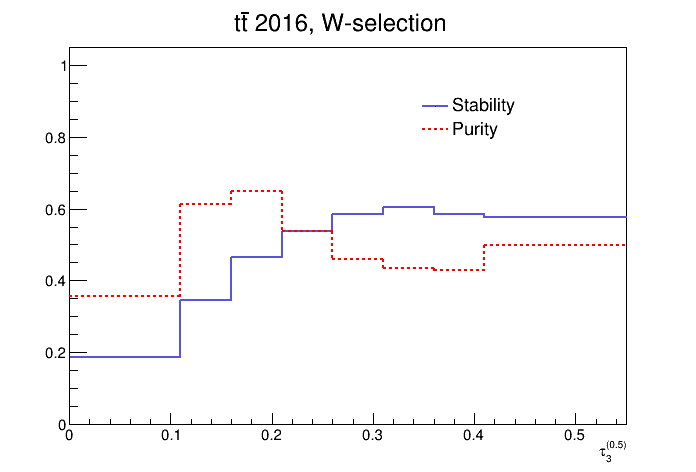

In [37]:
cpse = ROOT.TCanvas("pse_ttbar", "pse_ttbar")

purity.SetLineColor(ROOT.kRed)
purity.SetLineWidth(2)
purity.SetLineStyle(2)
purity.SetMinimum(0.)
purity.SetMaximum(1.05)

stability.SetLineColor(9)
stability.SetLineWidth(2)
stability.SetLineStyle(1)
stability.SetMinimum(0.)
stability.SetMaximum(1.05)
stability.SetTitle("t#bar{t} 2016, W-selection ")
stability.Draw("hist")
purity.Draw("hist same")
#efficiency.Draw("same")

leg0 = ROOT.TLegend(0.6, 0.7, 0.8, 0.8)
leg0.AddEntry( stability, "Stability ")
leg0.AddEntry( purity, "Purity ")
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
#hs.Draw("nostack")
leg0.Draw()

ROOT.gStyle.SetOptStat(0)
cpse.Draw()

(array([[3.100e+01, 4.800e+01, 8.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [5.900e+01, 1.010e+03, 5.400e+02, 0.000e+00, 3.800e+01, 4.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.900e+01, 1.508e+03, 5.267e+03, 0.000e+00, 1.261e+03, 5.900e+01,
         0.000e+00, 8.000e+00, 1.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [2.500e+01, 3.290e+02, 4.880e+03, 0.000e+00, 7.621e+03, 1.279e+03,
         0.000e+00, 7.200e+01, 3.000e+00, 0.000e+00],
        [1.900e+01, 2.500e+01, 5.990e+02, 0.000e+00, 4.786e+03, 5.275e+03,
         0.000e+00, 7.590e+02, 4.300e+01, 3.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [9.000e+00, 3.000e+00, 2.600e+01, 0.000e+00, 4.380e+02, 2.270e+03,
         0.000e+00, 2.

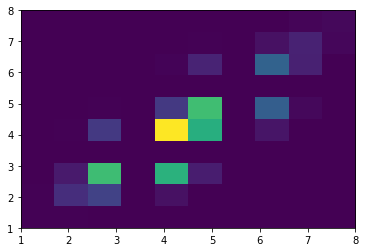

In [38]:
plt.hist2d(x=det_bin_index, y=gen_bin_index)

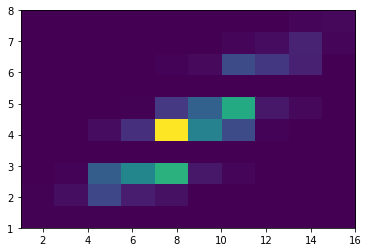

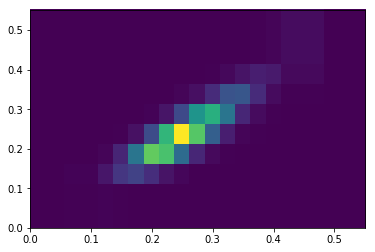

In [39]:
plt.hist2d(x=det_bin_index2, y=gen_bin_index)
plt.show()
plt.hist2d(x=MC_sig_reco_tau3_0p5, y=MC_sig_gen_tau3_0p5, bins=[det_bins, gen_bins])
plt.show()

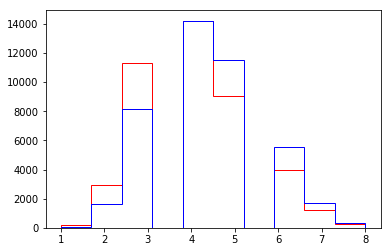

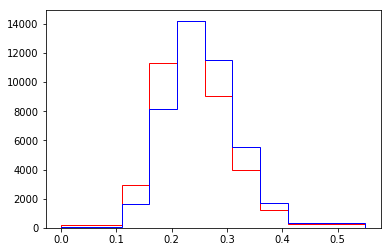

In [40]:
plt.hist(gen_bin_index, histtype='step', color='r')
plt.hist(det_bin_index, histtype='step', color='b')
plt.show()

plt.hist(MC_sig_gen_tau3_0p5, histtype='step', color='r', bins=gen_bins)
plt.hist(MC_sig_reco_tau3_0p5, histtype='step', color='b', bins=gen_bins)
plt.show()

### with root

In [41]:
ps_bindex = 0 

l = 1

tot_col = [] #np.array([0. for i in xrange(0, purity.GetNbinsX()+1)]) #
#tot_col_err = [] #0 

tot_row = np.array([0. for i in xrange(1, purity.GetNbinsX()+1)])
#tot_row_err = np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])

diag = [] #np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])
#diag_error = [] # np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])

for i in range(0, response.GetNbinsY()+1):    
    
    k = 0
    col = 0.
    d_jj = 0.
    for j in range(1, response.GetNbinsX()+1):
    
        r_ij = response.GetBinContent(i,j)
        #r_ij_err = response.GetBinError(i,j)
        #print (i,j), r_ij
        
        if (j)%2==0 and j < (response.GetNbinsX()+1):
            #since 2 reco bins per 1 gen bin
            print "Filling row index k={} with elements (i,j)=({},{})".format(k,i,j)
            tot_row[k] += r_ij
            print "Filling row index k={} with elements (i,j)=({},{})".format(k,i,j+1)
            tot_row[k] +=  response.GetBinContent(i,j+1)
            
            #tot_col_err[k] += response.GetBinError(i,j)
            #tot_col_err[k] +=  response.GetBinError(i,j+1)
            
            k +=1
        
        col += r_ij
        
        if l==j:
            print "Adding content (equal to {}) of bin i={}, j={} to Diagonal".format(r_ij, i,j), l
            d_jj += r_ij
 
            print "Adding content (equal to {}) of bin i={}, j={} to Diagonal".format( response.GetBinContent(i,j+1), i,j+1), l
            d_jj += response.GetBinContent(i,j+1)

            diag.append(d_jj)
    l = l+2
    print col, d_jj

Adding content (equal to 0.0) of bin i=0, j=1 to Diagonal 1
Adding content (equal to 0.0) of bin i=0, j=2 to Diagonal 1
Filling row index k=0 with elements (i,j)=(0,2)
Filling row index k=0 with elements (i,j)=(0,3)
Filling row index k=1 with elements (i,j)=(0,4)
Filling row index k=1 with elements (i,j)=(0,5)
Filling row index k=2 with elements (i,j)=(0,6)
Filling row index k=2 with elements (i,j)=(0,7)
Filling row index k=3 with elements (i,j)=(0,8)
Filling row index k=3 with elements (i,j)=(0,9)
Filling row index k=4 with elements (i,j)=(0,10)
Filling row index k=4 with elements (i,j)=(0,11)
Filling row index k=5 with elements (i,j)=(0,12)
Filling row index k=5 with elements (i,j)=(0,13)
Filling row index k=6 with elements (i,j)=(0,14)
Filling row index k=6 with elements (i,j)=(0,15)
Filling row index k=7 with elements (i,j)=(0,16)
Filling row index k=7 with elements (i,j)=(0,17)
0.0 0.0
Filling row index k=0 with elements (i,j)=(1,2)
Filling row index k=0 with elements (i,j)=(1,3)


In [42]:
print diag
print tot_row
print diag/tot_row

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4351.79625631 3318.25889355   27.31818678    0.            0.
    0.            0.            0.        ]
[ 0.  0.  0. nan nan nan nan nan]


/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
purity_reco_binning = [0] 
diag = 0
for i in range(1, response.GetNbinsX()+1):
    for j in range(1, response.GetNbinsY()+1):
        dval = response.GetBinContent(i,j)
        if i==j:
            diag = diag+dval
            print i, j, 
            if i==0 and j==0: purity_reco_binning[0] = dval/
            else: purity_reco_binning.append()
        j = j+2

SyntaxError: invalid syntax (<ipython-input-43-dc72c7765764>, line 9)

### Unfolding 

In [44]:
print 'getting tunfolder:'

orientation = ROOT.TUnfoldDensity.kHistMapOutputHoriz
regMode = ROOT.TUnfoldDensity.kRegModeCurvature
con = ROOT.TUnfoldDensity.kEConstraintNone
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
errmode = ROOT.TUnfoldSys.kSysErrModeMatrix
#tunfolder_MC = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")
#tunfolder_data = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")

tunfolder_MC = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)
tunfolder_data = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 16 input bins and 8 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{3}^{(0.5)}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (yaxis:#tau_{3}^{(0.5)}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]
Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 16 input bins and 8 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{3}^{(0.5)}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (yaxis:#tau_{3}^{(0.5)}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteeri

Set the input, a 1D reconstructed histogram from either MC_sig (closure) or Data (measurement) , binned in the detector level binning. Subtract background contributions from data, using reco-MC bkg.

In [45]:
print 'setting reco input'
tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco input


In [46]:
print 'setting reco MC input'
tunfolder_MC.SetInput( histMdetMC_sig )
#tunfolder_MC.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco MC input


0

In [47]:
unfolded_data = tunfolder_data.DoUnfold(0.)
unfolded_data = tunfolder_data.GetOutput("unfolded_data")

unfolded_MC = tunfolder_MC.DoUnfold(0.)
unfolded_MC = tunfolder_MC.GetOutput("unfolded_MC")

In [48]:
ROOT.gStyle.SetOptStat(0)

Info in <TCanvas::Print>: png file tau3_0p5_unfolding_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file tau3_0p5_unfolding_Escheme_bkgsub.pdf has been created


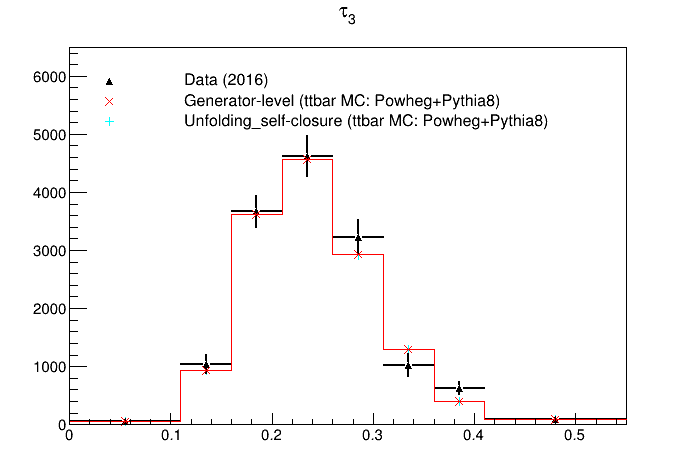

In [49]:
c5 = ROOT.TCanvas('c5', 'c5')

unfolded_MC.SetMarkerStyle(2)
unfolded_MC.SetMarkerColor(7)
unfolded_MC.SetLineColor(7)
unfolded_MC.SetLineWidth(1)

unfolded_data.SetMarkerStyle(22)
unfolded_data.SetMarkerColor(1)
unfolded_data.SetLineColor(1)
unfolded_data.SetLineWidth(2)


#unfolded_MC.SetFillColor(0)
#histMgenData.SetMarkerStyle(4)
#histMgenData.SetMarkerColor(2)
#histMgenData.SetOption("E")
#histMgenData.SetLineColor(2)
histMgenMC_sig.SetMarkerStyle(5)
histMgenMC_sig.SetMarkerColor(2)
histMgenMC_sig.SetLineColor(2)



hs = ROOT.THStack("#tau_{3}", "#tau_{3}")
#hs.Add
hs.SetMaximum(6500)
#hs.Add( histMgenData, "E HIST")
hs.Add( unfolded_MC, "E HIST")
hs.Add( unfolded_data, "E ")
hs.Add(histMgenMC_sig, "E HIST")
#hs.Add(histMdetMC_sig, "E")
#hs.Add(histMdetData, "E")

leg0 = ROOT.TLegend(0.05, 0.72, 0.91, 0.85)
leg0.AddEntry( unfolded_data, "Data (2016)", 'p')
leg0.AddEntry( histMgenMC_sig, "Generator-level (ttbar MC: Powheg+Pythia8)", 'p')
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.AddEntry( unfolded_MC, "Unfolding_self-closure (ttbar MC: Powheg+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
hs.Draw("nostack")
leg0.Draw()

c5.Draw()
c5.SaveAs("tau3_0p5_unfolding_Escheme_bkgsub.png")
c5.SaveAs("tau3_0p5_unfolding_Escheme_bkgsub.pdf")

In [50]:
ratio = ROOT.TH1D("","; #tau_{3}^{(1)}",  gen_bins.shape[0]-1, (gen_bins))
ratio.GetXaxis().SetTitle("#tau_{3}^{(1)}");
#ratio.GetYaxis().SetTitleOffset(0.);
ratio.GetYaxis().CenterTitle(ROOT.kTRUE);
ratio.GetXaxis().CenterTitle(ROOT.kTRUE);
ratio.GetYaxis().SetRangeUser(0.7,1.3)
ratio.Add(unfolded_MC)
ratio.GetYaxis().SetTitle("#frac{Unfolded Powheg}{Gen-level Powheg}")
ratio.Sumw2()
ratio.SetStats(0)
ratio.Divide(histMgenMC_sig);
ratio.GetYaxis().SetLabelSize(0.09)
ratio.GetXaxis().SetLabelSize(0.09)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.12)
ratio.GetYaxis().SetTitleOffset(0.4)
ratio.GetXaxis().SetTitleSize(0.12)
ratio.GetXaxis().SetTitleOffset(0.85)

print "Bin Content", "\t", "Bin error", "\t", "Bin Center", "\t", "Bin Low-Edge", "\t", "Ratio to Truth for bin", "\t", "Ratio Error"
for i in xrange(1,gen_bins.shape[0]):
    print "%0.4f"%unfolded_MC.GetBinContent(i), "\t", "%0.4f"%unfolded_MC.GetBinError(i), "\t", unfolded_MC.GetBinCenter(i), "\t", unfolded_MC.GetBinLowEdge(i), "%0.4f"%ratio.GetBinContent(i), "%0.4f"%ratio.GetBinError(i)

Bin Content 	Bin error 	Bin Center 	Bin Low-Edge 	Ratio to Truth for bin 	Ratio Error
54.6701 	16.8317 	0.055 	0.0 1.0000 0.3182
942.1768 	49.3597 	0.135 	0.11 1.0000 0.0558
3618.3702 	93.4536 	0.185 	0.16 1.0000 0.0276
4560.4160 	111.8421 	0.235 	0.21 1.0000 0.0260
2930.6716 	92.2772 	0.285 	0.26 1.0000 0.0333
1298.2386 	60.1170 	0.335 	0.31 1.0000 0.0492
406.9164 	33.7262 	0.385 	0.36 1.0000 0.0880
89.6779 	12.6241 	0.48 	0.41 1.0000 0.1542


Info in <TCanvas::Print>: png file tau_3_0p5_MC_SC_ratio_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file tau_3_0p5_MC_SC_ratio_Escheme_bkgsub.pdf has been created


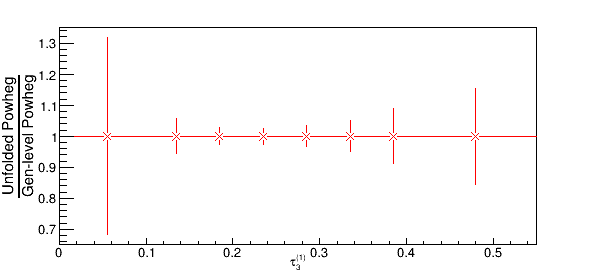

In [51]:
c6 = ROOT.TCanvas("c6","c6", 600,300)
ratio.GetYaxis().SetLabelSize(0.05)
ratio.GetXaxis().SetLabelSize(0.05)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerStyle(5)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.06)
ratio.GetYaxis().SetTitleOffset(0.7)
ratio.GetXaxis().SetTitleSize(0.05)
ratio.GetXaxis().SetTitleOffset(0.8)
#ratio.SetMinimum(0.7)
#ratio.SetMaximum(1.3)
#ratio.SetMarkerStyle(21);
ratio.Draw("ep")
c6.Draw()
c6.SaveAs("tau_3_0p5_MC_SC_ratio_Escheme_bkgsub.png")
c6.SaveAs("tau_3_0p5_MC_SC_ratio_Escheme_bkgsub.pdf")

In [52]:
# get unfolding output
# includes the statistical and background errors
# but not the other systematic uncertainties
#tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

histUnfoldOutput= tunfolder_data.GetOutput("unfolded_data")

# retreive error matrix of statistical errors
histEmatStat=tunfolder_data.GetEmatrixInput("unfolding stat error matrix");
# retreive full error matrix
# This includes all systematic errors
histEmatTotal=tunfolder_data.GetEmatrixTotal("unfolding total error matrix");
# create two copies of the unfolded data, one with statistical errors
# the other with total errors
histUnfoldStat=ROOT.TH1D("tau3_0p5(unfold,staterr)",";tau3_0p5(gen)",  gen_bins.shape[0]-1, (gen_bins));
histUnfoldTotal=ROOT.TH1D("tau3_0p5(unfold,totalerr)",";tau3_0p5(gen)",  gen_bins.shape[0]-1, (gen_bins));

for i in xrange(0, gen_bins.shape[0]): 
    c=histUnfoldOutput.GetBinContent(i);
    # histogram with unfolded data and stat errors
    histUnfoldStat.SetBinContent(i,c);
    histUnfoldStat.SetBinError(i,np.sqrt(histEmatStat.GetBinContent(i,i)));
    # histogram with unfolded data and total errors
    histUnfoldTotal.SetBinContent(i,c);
    histUnfoldTotal.SetBinError(i,np.sqrt(histEmatTotal.GetBinContent(i,i)));

# create histogram with correlation matrix
histCorr=ROOT.TH2D("Corr(total)",";tau3_0p5(gen);tau3_0p5(gen)",  gen_bins.shape[0]-1, (gen_bins), gen_bins.shape[0]-1, (gen_bins));
for i in xrange(0, gen_bins.shape[0]): 
    ei,ej = 0,0
    ei=np.sqrt(histEmatTotal.GetBinContent(i,i));
    if(ei<=0.0): continue
    for j in xrange(0, gen_bins.shape[0]):
        ej=np.sqrt(histEmatTotal.GetBinContent(j,j));
        if(ej<=0.0): continue
        histCorr.SetBinContent(i,j,histEmatTotal.GetBinContent(i,j)/ei/ej);

# retreive bgr source 1
#histdetNormBgr1=tunfolder_data.GetBackground("bgr1 normalized", "background1");
histMdetNormBgrTotal=tunfolder_data.GetBackground("bkg_all");
#========================


Error in <TUnfoldDensity::SubtractBackground>: Source bkg_all given twice, ignoring 2nd call.

Warning in <TROOT::Append>: Replacing existing TH1: unfolded_data (Potential memory leak).


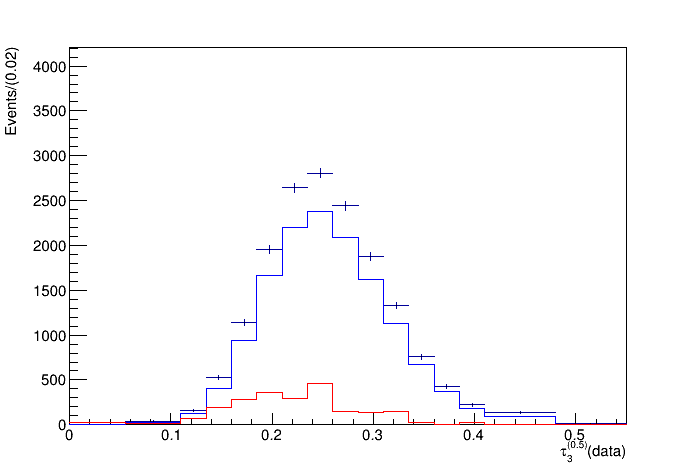

In [53]:
# Step 7: plots
output = ROOT.TCanvas();
#output.Divide(3,2);
#output.cd(1);
# data, MC prediction, background
#histMdetData.SetMinimum(0.0);
histMdetData.SetMaximum(histMdetData.GetMaximum()*1.5);
histMdetData.Draw("E");
#histMdetMC_sig.SetMinimum(0.0);
histMdetMC_sig.SetLineColor(ROOT.kBlue);
histMdetNormBgrTotal.SetLineColor(ROOT.kRed);
#histdetNormBgr1.SetLineColor(ROOT.kCyan);
histMdetMC_sig.Draw("SAME HIST");
#histdetNormBgr1.Draw("SAME HIST");
histMdetNormBgrTotal.Draw("SAME HIST");
output.Draw()

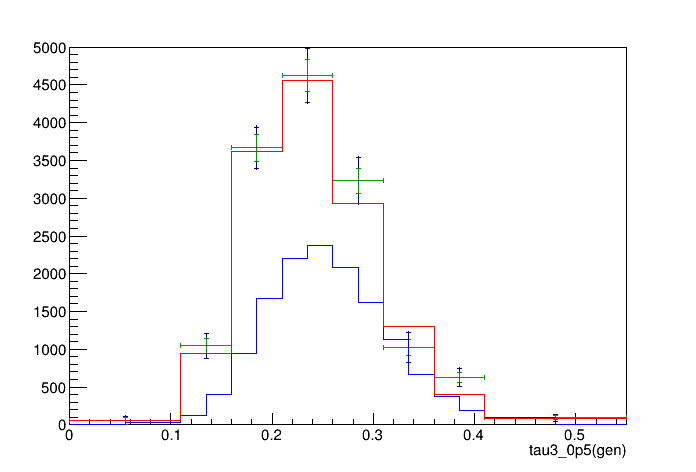

In [54]:
#output.cd(2)
# unfolded data, data truth, MC truth
output = ROOT.TCanvas();
histUnfoldTotal.SetMinimum(0.0);
histUnfoldTotal.SetMaximum(5000);
histUnfoldTotal.SetLineColor(ROOT.kBlue+3)
histUnfoldTotal.SetLineWidth(1)
# outer error: total error
histUnfoldTotal.Draw("E");
# middle error: stat+bgr
histUnfoldOutput.SetLineWidth(1)
histUnfoldOutput.Draw("SAME E1");
# inner error: stat only
histUnfoldStat.SetLineColor(ROOT.kGreen+2)
histUnfoldStat.Draw("SAME E1");

histMdetMC_sig.Draw("SAME HIST");
histMgenMC_sig.Draw("SAME HIST");
#histBbbSignalGen.SetLineColor(ROOT.kBlue);
#histBbbSignalGen.Draw("SAME HIST");
output.Draw()

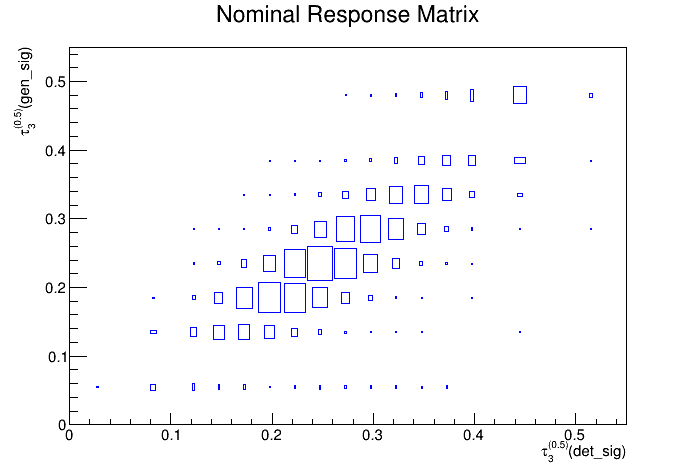

In [55]:
output.cd(3);
# unfolding matrix
response.SetLineColor(ROOT.kBlue);
response.Draw("BOX");

output.Draw()

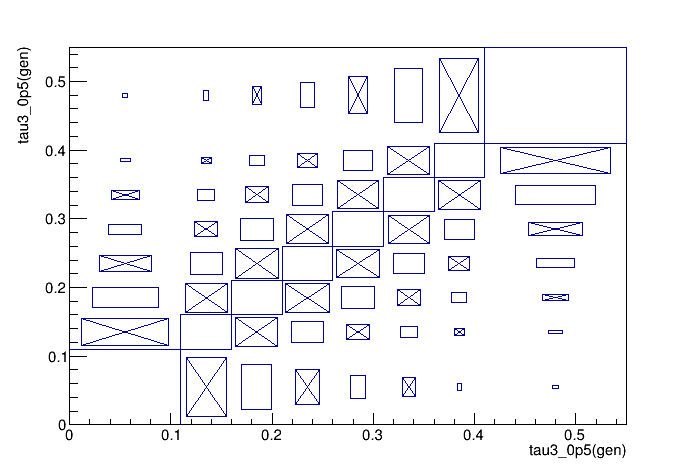

In [56]:
# show tau as a function of chi**2
output.cd(4);
#logTauX.Draw();
#bestLogTauLogChi2.SetMarkerColor(ROOT.kRed);
#bestLogTauLogChi2.Draw("*");
# show the L curve
output.cd(5);
#lCurve.Draw("AL");
#bestLcurve.SetMarkerColor(ROOT.kRed);
#bestLcurve.Draw("*");
# show correlation matrix
output.cd(6);
histCorr.Draw("BOX");
output.Draw()

# $\tau_{3}^{(1)}$ unfolding with background subtraction + purity&stability study [w/ E-scheme recombination+excl. $k_T$ axes]


In [57]:
Wjets_gen_tau3_1 = Wjets_gen_nSub_basis[:,7]

ST1_gen_tau3_1 = ST1_gen_nSub_basis[:,7]

ST2_gen_tau3_1 = ST2_gen_nSub_basis[:,7]

ST3_gen_tau3_1 = ST3_gen_nSub_basis[:,7]

ST4_gen_tau3_1 = ST4_gen_nSub_basis[:,7]

ST5_gen_tau3_1 = ST5_gen_nSub_basis[:,7]

TTbar_gen_tau3_1 = TTbar_gen_nSub_basis[:,7]

In [58]:
Wjets_reco_tau3_1 = Wjets_reco_nSub_basis[:,7]

ST1_reco_tau3_1 = ST1_reco_nSub_basis[:,7]

ST2_reco_tau3_1 = ST2_reco_nSub_basis[:,7]

ST3_reco_tau3_1 = ST3_reco_nSub_basis[:,7]

ST4_reco_tau3_1 = ST4_reco_nSub_basis[:,7]

ST5_reco_tau3_1 = ST5_reco_nSub_basis[:,7]

TTbar_reco_tau3_1 = TTbar_reco_nSub_basis[:,7]

# Unfolding $\tau_{3}^{(1)}$ with background subtraction

In [59]:
MC_sig_reco_tau3_1 = TTbar_reco_tau3_1
MC_sig_gen_tau3_1 = TTbar_gen_tau3_1

MC_bkg_reco_tau3_1 = np.concatenate((ST1_reco_tau3_1,ST2_reco_tau3_1,ST3_reco_tau3_1,ST4_reco_tau3_1,ST5_reco_tau3_1,Wjets_reco_tau3_1))
MC_bkg_gen_tau3_1 = np.concatenate((ST1_gen_tau3_1,ST2_gen_tau3_1,ST3_gen_tau3_1,ST4_gen_tau3_1,ST5_gen_tau3_1,Wjets_gen_tau3_1))

data_tau3_1 = data_nSub_basis[:,7]
weights_MC_sig = weight_TTbar
weights_MC_bkg = np.concatenate((weight_ST1,weight_ST2,weight_ST3,weight_ST4,weight_ST5,weight_Wjets))

Get the response matrix and input 1D distributions for unfolding.

In [60]:
print np.min(MC_sig_gen_tau3_1)
print np.min(MC_sig_reco_tau3_1)
print np.max(MC_sig_gen_tau3_1)
print np.max(MC_sig_reco_tau3_1), "\n"


print np.min(MC_bkg_gen_tau3_1)
print np.min(MC_bkg_reco_tau3_1)
print np.max(MC_bkg_gen_tau3_1)
print np.max(MC_bkg_reco_tau3_1), "\n"


print np.min(data_tau3_1)
print np.max(data_tau3_1)

0.0003852870431728661
0.005523808766156435
0.29837673902511597
0.2992352843284607 

0.008215026929974556
0.010058502666652203
0.24170826375484467
0.2581371068954468 

0.007881100289523602
0.3095865249633789


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [61]:
gen_bins = np.array([x for x in np.linspace(num=8, start=0., stop=0.21)])
gen_bins = np.concatenate((gen_bins, np.array([ 0.25,0.31])))
print gen_bins, gen_bins.shape[0]

det_bins = np.array([x for x in np.linspace(num=15, start=0., stop=0.21)])
det_bins = np.concatenate((det_bins, np.array([0.23, 0.25, 0.28, 0.31])))
print det_bins, det_bins.shape[0]

[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.25 0.31] 10
[0.    0.015 0.03  0.045 0.06  0.075 0.09  0.105 0.12  0.135 0.15  0.165
 0.18  0.195 0.21  0.23  0.25  0.28  0.31 ] 19


In [62]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

#### Fill histograms for sig and bkg. MC separately in this case (as one should!)

In [63]:
histMgenMC_bkg = ROOT.TH1D("histMgenMC_bkg", "histMgenMC_bkg; #tau_{3}^{(1)}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_bkg, MC_bkg_gen_tau3_1, weights=weights_MC_bkg)

histMdetMC_bkg = ROOT.TH1D("histMdetMC_bkg", "histMdetMC_bkg; #tau_{3}^{(1)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_bkg, MC_bkg_reco_tau3_1, weights=weights_MC_bkg)

histMgenMC_sig = ROOT.TH1D("histMgenMC_sig", "histMgenMC_sig; #tau_{3}^{(1)}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_sig, MC_sig_gen_tau3_1, weights=weights_MC_sig)

histMdetMC_sig = ROOT.TH1D("histMdetMC_sig", "histMdetMC_sig; #tau_{3}^{(1)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_sig, MC_sig_reco_tau3_1, weights=weights_MC_sig)

#histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{3}^{(1)}; Events/(0.02)", gen_bins.shape[0]-1, (gen_bins))
#fill_hist(histMgenData, TTbartruth_nSub_basis[:,4]/TTbartruth_nSub_basis[:,1])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{3}^{(1)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetData, data_tau3_1)

Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetData (Potential memory leak).


Set the X and Y axis labels

In [64]:
histMgenMC_bkg.SetTitle(";#tau_{3}^{(1)}(gen_bkg)")

histMdetMC_bkg.SetTitle(";#tau_{3}^{(1)}(det_bkg)")

histMgenMC_sig.SetTitle(";#tau_{3}^{(1)}(gen_sig)")

histMdetMC_sig.SetTitle(";#tau_{3}^{(1)}(det_sig)")

histMdetData.SetTitle(";#tau_{3}^{(1)}(data)")


Draw the variables at reco and gen level and for "data"

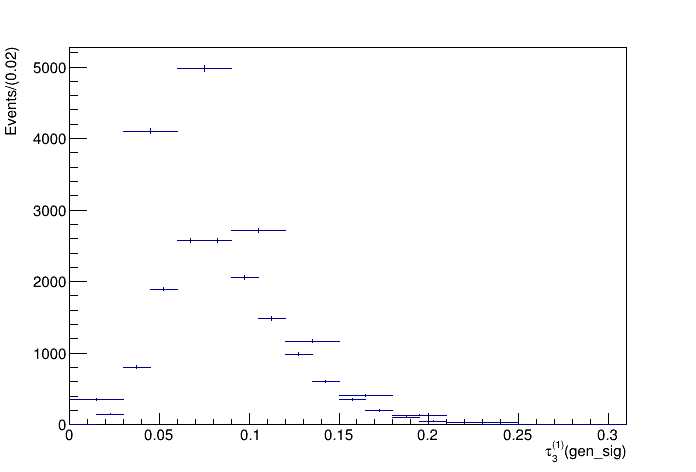

In [65]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
histMgenMC_sig.Draw("e")
histMdetMC_sig.Draw("e same")
c1.Draw()

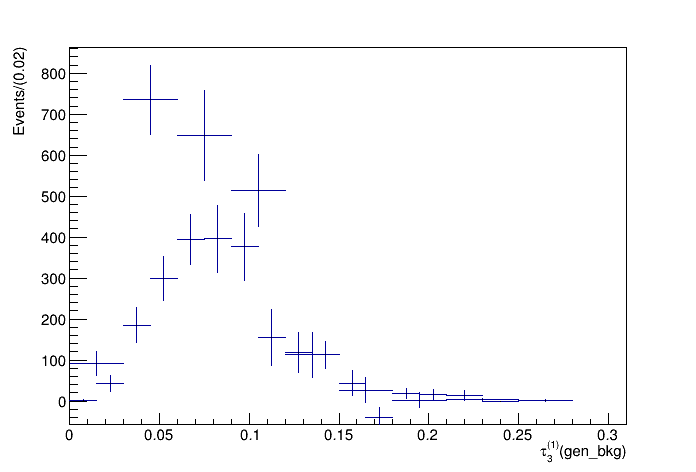

In [66]:
c1 = ROOT.TCanvas("chistMgenMC_bkg1", "chistMgenMC_bkg1")
histMgenMC_bkg.Draw("e")
histMdetMC_bkg.Draw("e same")
c1.Draw()

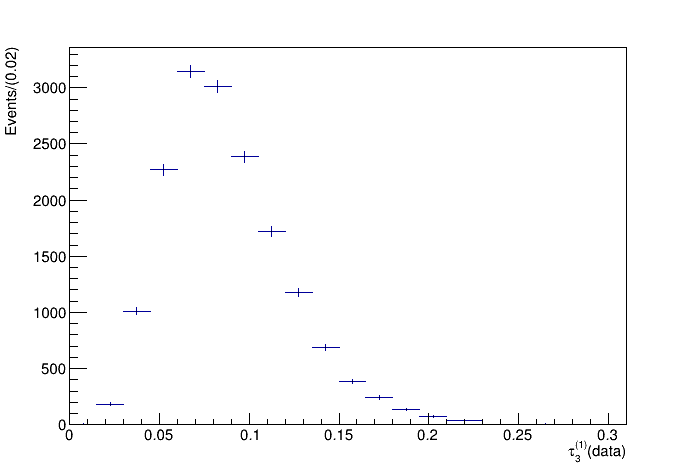

In [67]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
#histMgenData.Draw("e")
histMdetData.Draw("e ")
c1.Draw()

### Fill response matrix

In [68]:
response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
hist2Dfill = np.zeros((MC_sig_reco_tau3_1.shape[0], 2))
hist2Dfill[:,0] = MC_sig_reco_tau3_1.flatten()
hist2Dfill[:,1] = MC_sig_gen_tau3_1.flatten()
fill_hist(response, hist2Dfill, weights_MC_sig)
response.SetTitle("Nominal Response Matrix;#tau_{3}^{(1)}(det_sig);#tau_{3}^{(1)}(gen_sig)")

Warning in <TROOT::Append>: Replacing existing TH1: response (Potential memory leak).


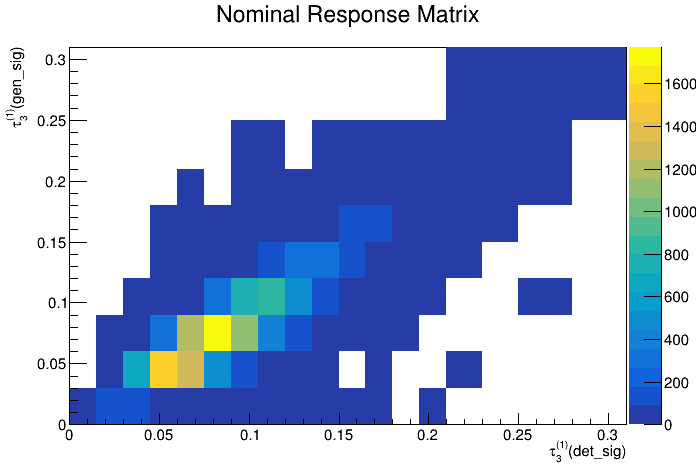

In [69]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

### Purity and Stability calculation

In [70]:
hMC_gen_bkg = ROOT.TH1D(histMgenMC_bkg)
#hMC_gen_bkg.Scale(1./norm_genMC_bkg)

hMC_reco_bkg = ROOT.TH1D(histMdetMC_bkg)
#hMC_reco_bkg.Scale(1./norm_recoMC_bkg)

hMC_gen_sig = ROOT.TH1D(histMgenMC_sig)
#hMC_gen_sig.Scale(1./norm_genMC_sig)

hMC_reco_sig = ROOT.TH1D(histMdetMC_sig)
#hMC_reco_sig.Scale(1./norm_recoMC_sig)

hMC_data = ROOT.TH1D(histMdetData)
#histMgenData.Scale(1./norm_genData)
#histMdetData.Scale(1./norm_detData)

'''
histMgenMC_bkg.Scale(1./norm_genMC_bkg)
histMdetMC_bkg.Scale(1./norm_recoMC_bkg)
histMgenMC_sig.Scale(1./norm_genMC_sig)
histMdetMC_sig.Scale(1./norm_recoMC_sig)

#histMgenData.Scale(1./norm_genData)
histMdetData.Scale(1./norm_detData)
''';

In [71]:
for i in xrange(0, histMdetMC_sig.GetNbinsX()+1):
    print i, hMC_reco_sig.GetBinLowEdge(i), hMC_reco_sig.GetBinContent(i)   
print "=========="
for i in xrange(0, hMC_gen_sig.GetNbinsX()+1):
    print i, hMC_gen_sig.GetBinLowEdge(i), hMC_gen_sig.GetBinContent(i)

0 -0.0172222222222 0.0
1 0.0 4.81127373947
2 0.015 144.297058159
3 0.03 805.668067781
4 0.045 1897.14830844
5 0.06 2577.99617218
6 0.075 2575.91015009
7 0.09 2064.02010432
8 0.105 1486.53808432
9 0.12 985.877606817
10 0.135 608.086368448
11 0.15 352.276417409
12 0.165 200.831028729
13 0.18 105.425673305
14 0.195 52.4006888302
15 0.21 25.9828806416
16 0.23 8.76503626177
17 0.25 4.65496829901
18 0.28 0.447741539687
0 -0.0344444444444 0.0
1 0.0 355.210362582
2 0.03 4102.48987493
3 0.06 4983.83093718
4 0.09 2716.06974781
5 0.12 1165.27704337
6 0.15 409.53596457
7 0.18 132.709221486
8 0.21 31.409386599
9 0.25 4.6050907788


In [72]:
purity = ROOT.TH1D("purity", "Purity and stability study; #tau_{3}^{(1)}; ",  gen_bins.shape[0]-1, (gen_bins))
stability = ROOT.TH1D("stability", "Purity and stability study; #tau_{3}^{(1)}; ",  gen_bins.shape[0]-1, (gen_bins))
efficiency = ROOT.TH1D("efficiency", "Purity and stability study; #tau_{3}^{(1)}; ",  gen_bins.shape[0]-1, (gen_bins))

Warning in <TROOT::Append>: Replacing existing TH1: purity (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: stability (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: efficiency (Potential memory leak).


### With python

We define purity as the fraction of reconstructed events that are generated in the same bin, 
and stability as the fraction of generated events that are reconstructed in the same
bin, divided by the overall reconstruction efficiency per bin. 

In [73]:
gen_arr = MC_sig_gen_tau3_1[:]
#print gen_arr[0:20]
#print gen_bins[0:-1]
gen_bin_index = np.digitize(gen_arr, gen_bins)
print gen_bin_index
#print gen_bin_index[0:20]

det_arr = MC_sig_reco_tau3_1[0:]
#print det_arr[0:20]
#print det_bins[0:-1]
det_bin_index = np.digitize(det_arr, gen_bins)
det_bin_index2 = np.digitize(det_arr, det_bins)
#print det_bin_index[0:20]

ndet_pergenbin = [0.] #N_recgen array = number of events generated in and reconstructed in gen bin i
ndet_genanywhere = [0.] # number of events reconstructed in gen _bin i but generated anywhere
ngen_detanywhere = [0.] # number of events generated in gen _bin i but reconstructed anywhere

### purity = # of evts generated and reconstructed in gen bin i / # of evts reconstructed in gen bin i but generated anywhere
### stability = # of evts generated and reconstructed in gen bin / # of evts generated in gen bin i but reconstructed anywhere
for i in xrange(0, gen_bins.shape[0]-1):
    
    #print i+1
    
    for k in xrange(0, gen_bin_index.shape[0]):
        
        if gen_bin_index[k]==i+1: 
            ngen_detanywhere[i]+=1 #stability denominator
            if det_bin_index[k]==i+1: ndet_pergenbin[i]+=1
            
    ngen_detanywhere.append(0.)
    ndet_pergenbin.append(0.)
    
    for k in xrange(0, det_bin_index.shape[0]):
        
        if det_bin_index[k]==i+1: 
            ndet_genanywhere[i]+=1 #purity denominator
            
    ndet_genanywhere.append(0.)
    
    print "Setting contents for P, S, eff. histos, in bin %d"%(i+1)
    purity.SetBinContent(i+1, ndet_pergenbin[i]/ndet_genanywhere[i])
    stability.SetBinContent(i+1, ndet_pergenbin[i]/ngen_detanywhere[i])
    efficiency.SetBinContent(i+1, ndet_pergenbin[i]/43107.)
    
    
ndet_pergenbin = np.array(ndet_pergenbin)
ndet_genanywhere = np.array(ndet_genanywhere)
ngen_detanywhere = np.array(ngen_detanywhere)

print "\n\n+++++++++Pure and Stable! :)+++++++++++++\n\n"
print ndet_pergenbin,"\n"
print ndet_genanywhere,"\n"
purity_arr = ndet_pergenbin/ndet_genanywhere
print "Purity array:", purity_arr[:-1], "\n\n"

print ndet_pergenbin,"\n"
print ngen_detanywhere,"\n"
stability_arr = ndet_pergenbin/ngen_detanywhere
print "Stability array:", stability_arr[:-1], "\n\n"

print "+++++Efficiency+++++\n"
efficiency_arr = ndet_pergenbin/np.sum(ngen_detanywhere)
print "Efficiency array:", efficiency_arr[:-1]

[2 3 4 ... 3 1 6]
Setting contents for P, S, eff. histos, in bin 1
Setting contents for P, S, eff. histos, in bin 2
Setting contents for P, S, eff. histos, in bin 3
Setting contents for P, S, eff. histos, in bin 4
Setting contents for P, S, eff. histos, in bin 5
Setting contents for P, S, eff. histos, in bin 6
Setting contents for P, S, eff. histos, in bin 7
Setting contents for P, S, eff. histos, in bin 8
Setting contents for P, S, eff. histos, in bin 9


+++++++++Pure and Stable! :)+++++++++++++


[2.860e+02 6.648e+03 9.179e+03 4.973e+03 2.035e+03 6.610e+02 1.870e+02
 4.200e+01 7.000e+00 0.000e+00] 

[4.4900e+02 8.4160e+03 1.6030e+04 1.1004e+04 4.9040e+03 1.6950e+03
 4.8500e+02 1.0900e+02 1.5000e+01 0.0000e+00] 

Purity array: [0.63697105 0.78992395 0.57261385 0.45192657 0.41496737 0.3899705
 0.38556701 0.3853211  0.46666667] 


[2.860e+02 6.648e+03 9.179e+03 4.973e+03 2.035e+03 6.610e+02 1.870e+02
 4.200e+01 7.000e+00 0.000e+00] 

[1.1060e+03 1.2812e+04 1.5463e+04 8.3860e+03 3.5640e

/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in divide
/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in divide


In [74]:
ROOT.gStyle.SetOptStat(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: pse_ttbar


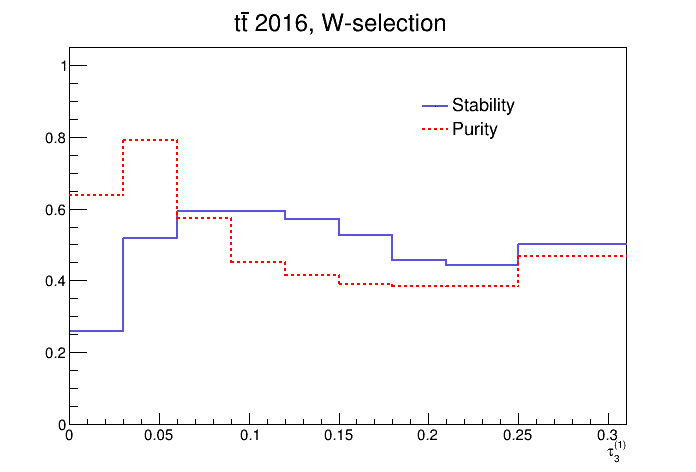

In [75]:
cpse = ROOT.TCanvas("pse_ttbar", "pse_ttbar")

purity.SetLineColor(ROOT.kRed)
purity.SetLineWidth(2)
purity.SetLineStyle(2)
purity.SetMinimum(0.)
purity.SetMaximum(1.05)

stability.SetLineColor(9)
stability.SetLineWidth(2)
stability.SetLineStyle(1)
stability.SetMinimum(0.)
stability.SetMaximum(1.05)
stability.SetTitle("t#bar{t} 2016, W-selection ")
stability.Draw("hist")
purity.Draw("hist same")
#efficiency.Draw("same")

leg0 = ROOT.TLegend(0.6, 0.7, 0.8, 0.8)
leg0.AddEntry( stability, "Stability ")
leg0.AddEntry( purity, "Purity ")
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
#hs.Draw("nostack")
leg0.Draw()

ROOT.gStyle.SetOptStat(0)
cpse.Draw()

(array([[2.860e+02, 1.590e+02, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [7.130e+02, 6.648e+03, 1.018e+03, 3.400e+01, 0.000e+00, 2.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [6.700e+01, 5.579e+03, 9.179e+03, 1.118e+03, 0.000e+00, 8.100e+01,
         5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
        [2.400e+01, 4.130e+02, 4.852e+03, 4.973e+03, 0.000e+00, 6.780e+02,
         5.600e+01, 6.000e+00, 2.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.100e+01, 1.100e+01, 3.870e+02, 2.084e+03, 0.000e+00, 2.035e+03,
         3.320e+02, 4.200e+01, 2.000e+00, 0.000e+00],
        [4.000e+00, 1.000e+00, 2.200e+01, 1.630e+02, 0.000e+00, 7.060e+02,
         6.610e+02, 1.250e+02, 1.300e+01, 0.000e+00],
        [1.000e+00, 0.000e+00, 1.000e+00, 1.300e+01, 0.000e+00, 6.100e+01,
         1.910e+02, 1.

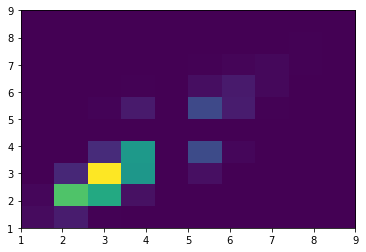

In [76]:
plt.hist2d(x=det_bin_index, y=gen_bin_index)

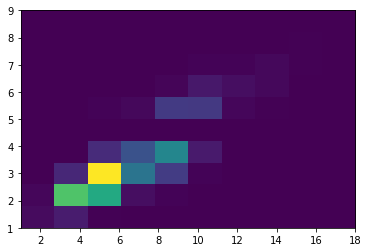

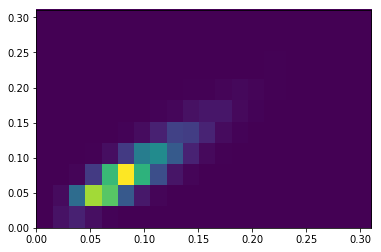

In [77]:
plt.hist2d(x=det_bin_index2, y=gen_bin_index)
plt.show()
plt.hist2d(x=MC_sig_reco_tau3_1, y=MC_sig_gen_tau3_1, bins=[det_bins, gen_bins])
plt.show()

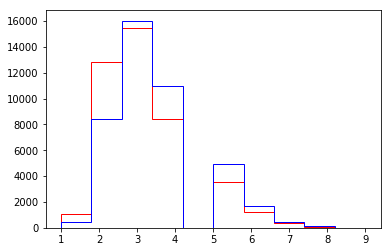

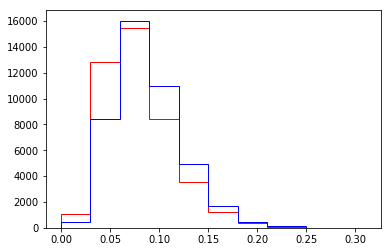

In [78]:
plt.hist(gen_bin_index, histtype='step', color='r')
plt.hist(det_bin_index, histtype='step', color='b')
plt.show()

plt.hist(MC_sig_gen_tau3_1, histtype='step', color='r', bins=gen_bins)
plt.hist(MC_sig_reco_tau3_1, histtype='step', color='b', bins=gen_bins)
plt.show()

### with root

In [ ]:
ps_bindex = 0 

l = 1

tot_col = [] #np.array([0. for i in xrange(0, purity.GetNbinsX()+1)]) #
#tot_col_err = [] #0 

tot_row = np.array([0. for i in xrange(1, purity.GetNbinsX()+1)])
#tot_row_err = np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])

diag = [] #np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])
#diag_error = [] # np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])

for i in range(0, response.GetNbinsY()+1):    
    
    k = 0
    col = 0.
    d_jj = 0.
    for j in range(1, response.GetNbinsX()+1):
    
        r_ij = response.GetBinContent(i,j)
        #r_ij_err = response.GetBinError(i,j)
        #print (i,j), r_ij
        
        if (j)%2==0 and j < (response.GetNbinsX()+1):
            #since 2 reco bins per 1 gen bin
            print "Filling row index k={} with elements (i,j)=({},{})".format(k,i,j)
            tot_row[k] += r_ij
            print "Filling row index k={} with elements (i,j)=({},{})".format(k,i,j+1)
            tot_row[k] +=  response.GetBinContent(i,j+1)
            
            #tot_col_err[k] += response.GetBinError(i,j)
            #tot_col_err[k] +=  response.GetBinError(i,j+1)
            
            k +=1
        
        col += r_ij
        
        if l==j:
            print "Adding content (equal to {}) of bin i={}, j={} to Diagonal".format(r_ij, i,j), l
            d_jj += r_ij
 
            print "Adding content (equal to {}) of bin i={}, j={} to Diagonal".format( response.GetBinContent(i,j+1), i,j+1), l
            d_jj += response.GetBinContent(i,j+1)

            diag.append(d_jj)
    l = l+2
    print col, d_jj

In [ ]:
print diag
print tot_row
print diag/tot_row

In [ ]:
purity_reco_binning = [0] 
diag = 0
for i in range(1, response.GetNbinsX()+1):
    for j in range(1, response.GetNbinsY()+1):
        dval = response.GetBinContent(i,j)
        if i==j:
            diag = diag+dval
            print i, j, 
            if i==0 and j==0: purity_reco_binning[0] = dval/
            else: purity_reco_binning.append()
        j = j+2

### Unfolding 

In [79]:
print 'getting tunfolder:'

orientation = ROOT.TUnfoldDensity.kHistMapOutputHoriz
regMode = ROOT.TUnfoldDensity.kRegModeCurvature
con = ROOT.TUnfoldDensity.kEConstraintNone
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
errmode = ROOT.TUnfoldSys.kSysErrModeMatrix
#tunfolder_MC = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")
#tunfolder_data = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")

tunfolder_MC = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)
tunfolder_data = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 18 input bins and 9 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{3}^{(1)}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (yaxis:#tau_{3}^{(1)}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]
Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 18 input bins and 9 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{3}^{(1)}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (yaxis:#tau_{3}^{(1)}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[U

Set the input, a 1D reconstructed histogram from either MC_sig (closure) or Data (measurement) , binned in the detector level binning. Subtract background contributions from data, using reco-MC bkg.

In [80]:
print 'setting reco input'
tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco input


In [81]:
print 'setting reco MC input'
tunfolder_MC.SetInput( histMdetMC_sig )
#tunfolder_MC.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco MC input


0

In [82]:
unfolded_data = tunfolder_data.DoUnfold(0.)
unfolded_data = tunfolder_data.GetOutput("unfolded_data")

unfolded_MC = tunfolder_MC.DoUnfold(0.)
unfolded_MC = tunfolder_MC.GetOutput("unfolded_MC")

Warning in <TROOT::Append>: Replacing existing TH1: unfolded_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: unfolded_MC (Potential memory leak).


In [83]:
ROOT.gStyle.SetOptStat(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Info in <TCanvas::Print>: png file tau3_1_unfolding_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file tau3_1_unfolding_Escheme_bkgsub.pdf has been created


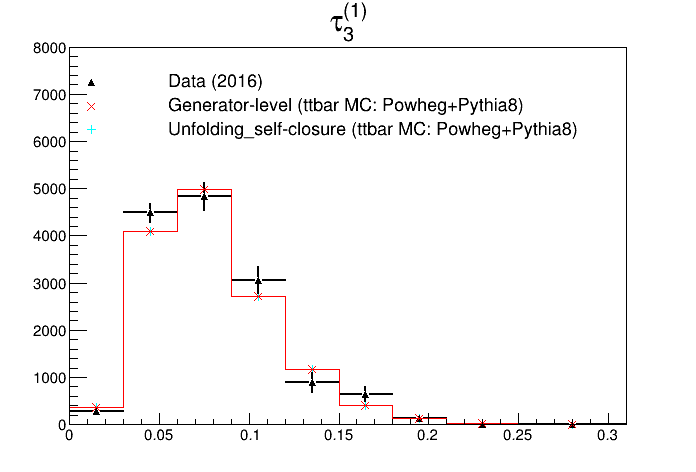

In [84]:
c5 = ROOT.TCanvas('c5', 'c5')

unfolded_MC.SetMarkerStyle(2)
unfolded_MC.SetMarkerColor(7)
unfolded_MC.SetLineColor(7)
unfolded_MC.SetLineWidth(1)

unfolded_data.SetMarkerStyle(22)
unfolded_data.SetMarkerColor(1)
unfolded_data.SetLineColor(1)
unfolded_data.SetLineWidth(2)


#unfolded_MC.SetFillColor(0)
#histMgenData.SetMarkerStyle(4)
#histMgenData.SetMarkerColor(2)
#histMgenData.SetOption("E")
#histMgenData.SetLineColor(2)
histMgenMC_sig.SetMarkerStyle(5)
histMgenMC_sig.SetMarkerColor(2)
histMgenMC_sig.SetLineColor(2)



hs = ROOT.THStack("#tau_{3}^{(1)}", "#tau_{3}^{(1)}")
#hs.Add
#hs.SetMinimum(0)
hs.SetMaximum(8000)
#hs.Add( histMgenData, "E HIST")
hs.Add( unfolded_MC, "E HIST")
hs.Add( unfolded_data, "E ")
hs.Add(histMgenMC_sig, "E HIST")
#hs.Add(histMdetMC_sig, "E")
#hs.Add(histMdetData, "E")

leg0 = ROOT.TLegend(0.02, 0.7, 0.91, 0.85)
leg0.AddEntry( unfolded_data, "Data (2016)", 'p')
leg0.AddEntry( histMgenMC_sig, "Generator-level (ttbar MC: Powheg+Pythia8)", 'p')
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.AddEntry( unfolded_MC, "Unfolding_self-closure (ttbar MC: Powheg+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
hs.Draw("nostack")
leg0.Draw()

c5.Draw()
c5.SaveAs("tau3_1_unfolding_Escheme_bkgsub.png")
c5.SaveAs("tau3_1_unfolding_Escheme_bkgsub.pdf")

In [85]:
ratio = ROOT.TH1D("","; #tau_{3}^{(1)}",  gen_bins.shape[0]-1, (gen_bins))
ratio.GetXaxis().SetTitle("#tau_{3}^{(1)}");
#ratio.GetYaxis().SetTitleOffset(0.);
ratio.GetYaxis().CenterTitle(ROOT.kTRUE);
ratio.GetXaxis().CenterTitle(ROOT.kTRUE);
ratio.GetYaxis().SetRangeUser(0.7,1.3)
ratio.Add(unfolded_MC)
ratio.GetYaxis().SetTitle("#frac{Unfolded Powheg}{Gen-level Powheg}")
ratio.Sumw2()
ratio.SetStats(0)
ratio.Divide(histMgenMC_sig);
ratio.GetYaxis().SetLabelSize(0.09)
ratio.GetXaxis().SetLabelSize(0.09)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.12)
ratio.GetYaxis().SetTitleOffset(0.4)
ratio.GetXaxis().SetTitleSize(0.12)
ratio.GetXaxis().SetTitleOffset(0.85)

print "Bin Content", "\t", "Bin error", "\t", "Bin Center", "\t", "Bin Low-Edge", "\t", "Ratio to Truth for bin", "\t", "Ratio Error"
for i in xrange(1,gen_bins.shape[0]):
    print "%0.4f"%unfolded_MC.GetBinContent(i), "\t", "%0.4f"%unfolded_MC.GetBinError(i), "\t", unfolded_MC.GetBinCenter(i), "\t", unfolded_MC.GetBinLowEdge(i), "%0.4f"%ratio.GetBinContent(i), "%0.4f"%ratio.GetBinError(i)

Bin Content 	Bin error 	Bin Center 	Bin Low-Edge 	Ratio to Truth for bin 	Ratio Error
355.2104 	25.3067 	0.015 	0.0 1.0000 0.0779
4102.4899 	68.8677 	0.045 	0.03 1.0000 0.0192
4983.8309 	93.1074 	0.075 	0.06 1.0000 0.0205
2716.0697 	86.8653 	0.105 	0.09 1.0000 0.0340
1165.2770 	66.5316 	0.135 	0.12 1.0000 0.0597
409.5360 	45.8592 	0.165 	0.15 1.0000 0.1158
132.7092 	27.2439 	0.195 	0.18 1.0000 0.2118
31.4094 	10.8476 	0.23 	0.21 1.0000 0.3615
4.6051 	2.7281 	0.28 	0.25 1.0000 0.6521


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c6
Info in <TCanvas::Print>: png file tau_3_1_MC_SC_ratio_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file tau_3_1_MC_SC_ratio_Escheme_bkgsub.pdf has been created


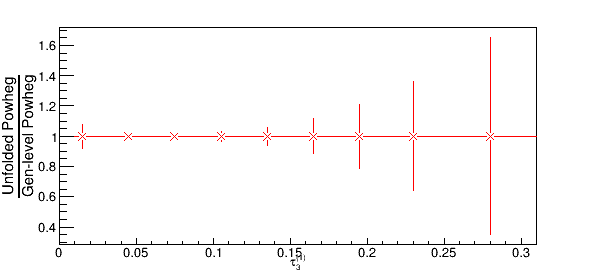

In [86]:
c6 = ROOT.TCanvas("c6","c6", 600,300)
ratio.GetYaxis().SetLabelSize(0.05)
ratio.GetXaxis().SetLabelSize(0.05)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerStyle(5)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.06)
ratio.GetYaxis().SetTitleOffset(0.7)
ratio.GetXaxis().SetTitleSize(0.05)
ratio.GetXaxis().SetTitleOffset(0.8)
#ratio.SetMinimum(0.7)
#ratio.SetMaximum(1.3)
#ratio.SetMarkerStyle(21);
ratio.Draw("ep")
c6.Draw()
c6.SaveAs("tau_3_1_MC_SC_ratio_Escheme_bkgsub.png")
c6.SaveAs("tau_3_1_MC_SC_ratio_Escheme_bkgsub.pdf")

In [87]:
# get unfolding output
# includes the statistical and background errors
# but not the other systematic uncertainties
#tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

histUnfoldOutput= tunfolder_data.GetOutput("unfolded_data")

# retreive error matrix of statistical errors
histEmatStat=tunfolder_data.GetEmatrixInput("unfolding stat error matrix");
# retreive full error matrix
# This includes all systematic errors
histEmatTotal=tunfolder_data.GetEmatrixTotal("unfolding total error matrix");
# create two copies of the unfolded data, one with statistical errors
# the other with total errors
histUnfoldStat=ROOT.TH1D("tau3_1(unfold,staterr)",";tau3_1(gen)",  gen_bins.shape[0]-1, (gen_bins));
histUnfoldTotal=ROOT.TH1D("tau3_1(unfold,totalerr)",";tau3_1(gen)",  gen_bins.shape[0]-1, (gen_bins));

for i in xrange(0, gen_bins.shape[0]): 
    c=histUnfoldOutput.GetBinContent(i);
    # histogram with unfolded data and stat errors
    histUnfoldStat.SetBinContent(i,c);
    histUnfoldStat.SetBinError(i,np.sqrt(histEmatStat.GetBinContent(i,i)));
    # histogram with unfolded data and total errors
    histUnfoldTotal.SetBinContent(i,c);
    histUnfoldTotal.SetBinError(i,np.sqrt(histEmatTotal.GetBinContent(i,i)));

# create histogram with correlation matrix
histCorr=ROOT.TH2D("Corr(total)",";tau3_1(gen);tau3_1(gen)",  gen_bins.shape[0]-1, (gen_bins), gen_bins.shape[0]-1, (gen_bins));
for i in xrange(0, gen_bins.shape[0]): 
    ei,ej = 0,0
    ei=np.sqrt(histEmatTotal.GetBinContent(i,i));
    if(ei<=0.0): continue
    for j in xrange(0, gen_bins.shape[0]):
        ej=np.sqrt(histEmatTotal.GetBinContent(j,j));
        if(ej<=0.0): continue
        histCorr.SetBinContent(i,j,histEmatTotal.GetBinContent(i,j)/ei/ej);

# retreive bgr source 1
#histdetNormBgr1=tunfolder_data.GetBackground("bgr1 normalized", "background1");
histMdetNormBgrTotal=tunfolder_data.GetBackground("bkg_all");
#========================


Error in <TUnfoldDensity::SubtractBackground>: Source bkg_all given twice, ignoring 2nd call.

Warning in <TROOT::Append>: Replacing existing TH1: unfolded_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: unfolding stat error matrix (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: unfolding total error matrix (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Corr(total) (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bkg_all (Potential memory leak).


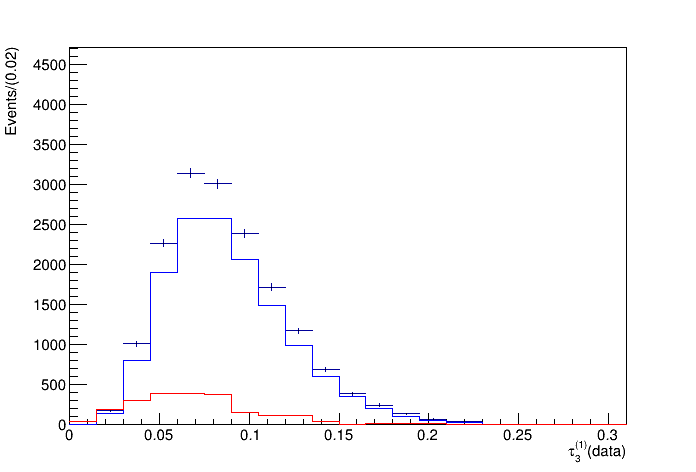

In [88]:
# Step 7: plots
output = ROOT.TCanvas();
#output.Divide(3,2);
#output.cd(1);
# data, MC prediction, background
#histMdetData.SetMinimum(0.0);
histMdetData.SetMaximum(histMdetData.GetMaximum()*1.5);
histMdetData.Draw("E");
#histMdetMC_sig.SetMinimum(0.0);
histMdetMC_sig.SetLineColor(ROOT.kBlue);
histMdetNormBgrTotal.SetLineColor(ROOT.kRed);
#histdetNormBgr1.SetLineColor(ROOT.kCyan);
histMdetMC_sig.Draw("SAME HIST");
#histdetNormBgr1.Draw("SAME HIST");
histMdetNormBgrTotal.Draw("SAME HIST");
output.Draw()

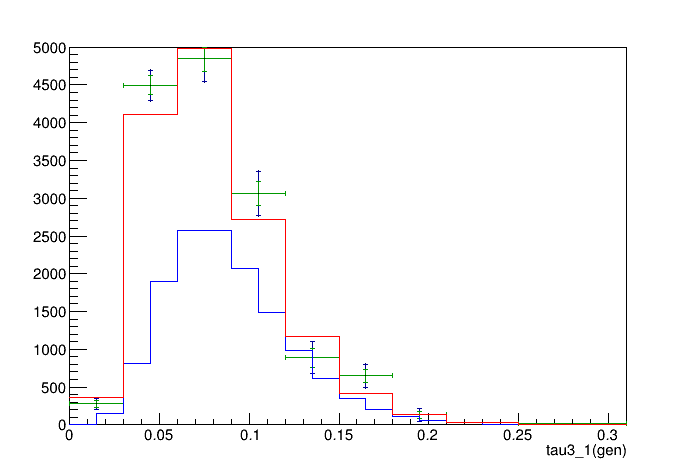

In [89]:
#output.cd(2)
# unfolded data, data truth, MC truth
output = ROOT.TCanvas();
histUnfoldTotal.SetMinimum(0.0);
histUnfoldTotal.SetMaximum(5000);
histUnfoldTotal.SetLineColor(ROOT.kBlue+3)
histUnfoldTotal.SetLineWidth(1)
# outer error: total error
histUnfoldTotal.Draw("E");
# middle error: stat+bgr
histUnfoldOutput.SetLineWidth(1)
histUnfoldOutput.Draw("SAME E1");
# inner error: stat only
histUnfoldStat.SetLineColor(ROOT.kGreen+2)
histUnfoldStat.Draw("SAME E1");

histMdetMC_sig.Draw("SAME HIST");
histMgenMC_sig.Draw("SAME HIST");
#histBbbSignalGen.SetLineColor(ROOT.kBlue);
#histBbbSignalGen.Draw("SAME HIST");
output.Draw()

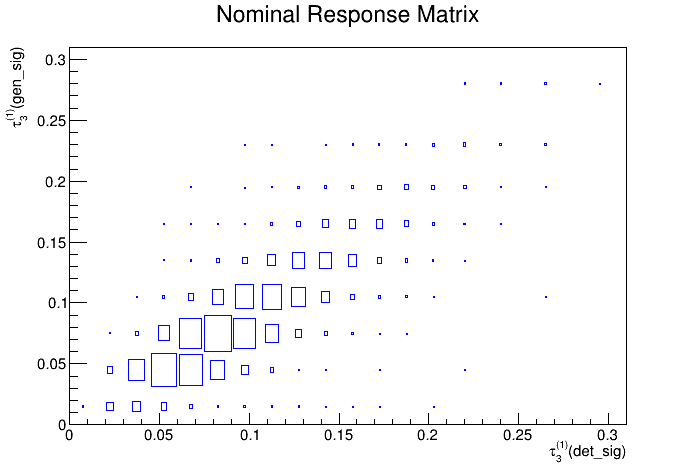

In [90]:
output.cd(3);
# unfolding matrix
response.SetLineColor(ROOT.kBlue);
response.Draw("BOX");

output.Draw()

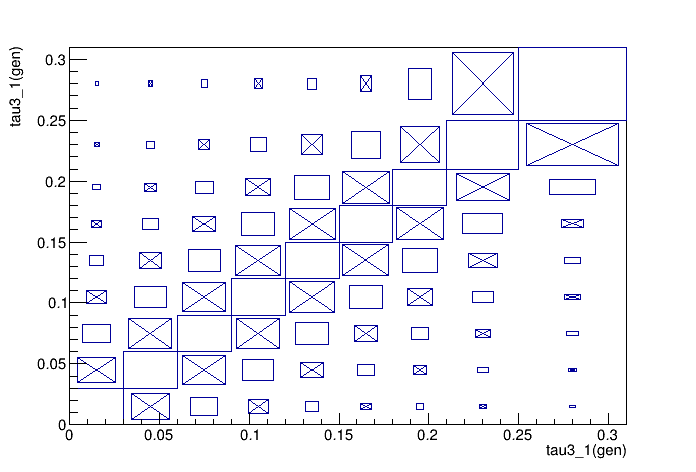

In [91]:
# show tau as a function of chi**2
output.cd(4);
#logTauX.Draw();
#bestLogTauLogChi2.SetMarkerColor(ROOT.kRed);
#bestLogTauLogChi2.Draw("*");
# show the L curve
output.cd(5);
#lCurve.Draw("AL");
#bestLcurve.SetMarkerColor(ROOT.kRed);
#bestLcurve.Draw("*");
# show correlation matrix
output.cd(6);
histCorr.Draw("BOX");
output.Draw()

# $\tau_{3}^{(2)}$ unfolding with background subtraction + purity&stability study [w/ E-scheme recombination+excl. $k_T$ axes]


In [19]:
Wjets_gen_tau3_2 = Wjets_gen_nSub_basis[:,8]

ST1_gen_tau3_2 = ST1_gen_nSub_basis[:,8]

ST2_gen_tau3_2 = ST2_gen_nSub_basis[:,8]

ST3_gen_tau3_2 = ST3_gen_nSub_basis[:,8]

ST4_gen_tau3_2 = ST4_gen_nSub_basis[:,8]

ST5_gen_tau3_2 = ST5_gen_nSub_basis[:,8]

TTbar_gen_tau3_2 = TTbar_gen_nSub_basis[:,8]

In [20]:
Wjets_reco_tau3_2 = Wjets_reco_nSub_basis[:,8]

ST1_reco_tau3_2 = ST1_reco_nSub_basis[:,8]

ST2_reco_tau3_2 = ST2_reco_nSub_basis[:,8]

ST3_reco_tau3_2 = ST3_reco_nSub_basis[:,8]

ST4_reco_tau3_2 = ST4_reco_nSub_basis[:,8]

ST5_reco_tau3_2 = ST5_reco_nSub_basis[:,8]

TTbar_reco_tau3_2 = TTbar_reco_nSub_basis[:,8]

# Unfolding $\tau_{3}^{(2)}$ with background subtraction

In [21]:
MC_sig_reco_tau3_2 = TTbar_reco_tau3_2
MC_sig_gen_tau3_2 = TTbar_gen_tau3_2

MC_bkg_reco_tau3_2 = np.concatenate((ST1_reco_tau3_2,ST2_reco_tau3_2,ST3_reco_tau3_2,ST4_reco_tau3_2,ST5_reco_tau3_2,Wjets_reco_tau3_2))
MC_bkg_gen_tau3_2 = np.concatenate((ST1_gen_tau3_2,ST2_gen_tau3_2,ST3_gen_tau3_2,ST4_gen_tau3_2,ST5_gen_tau3_2,Wjets_gen_tau3_2))

data_tau3_2 = data_nSub_basis[:,8]
weights_MC_sig = weight_TTbar
weights_MC_bkg = np.concatenate((weight_ST1,weight_ST2,weight_ST3,weight_ST4,weight_ST5,weight_Wjets))

Get the response matrix and input 1D distributions for unfolding.

In [22]:
print np.min(MC_sig_gen_tau3_2)
print np.min(MC_sig_reco_tau3_2)
print np.max(MC_sig_gen_tau3_2)
print np.max(MC_sig_reco_tau3_2), "\n"


print np.min(MC_bkg_gen_tau3_2)
print np.min(MC_bkg_reco_tau3_2)
print np.max(MC_bkg_gen_tau3_2)
print np.max(MC_bkg_reco_tau3_2), "\n"


print np.min(data_tau3_2)
print np.max(data_tau3_2)

7.746786286588758e-05
0.001071561360731721
0.11295222491025925
0.11467206478118896 

0.00046428811037912965
0.0012451540678739548
0.08935955166816711
0.0925329402089119 

0.001063680974766612
0.1285649985074997


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [82]:
gen_bins = np.array([x for x in np.linspace(num=5, start=0., stop=0.04)])
gen_bins = np.concatenate((gen_bins, np.array([0.06, 0.08, 0.13])))
print gen_bins, gen_bins.shape[0]

det_bins = np.array([x for x in np.linspace(num=9, start=0., stop=0.04)])
det_bins = np.concatenate((det_bins, np.array([0.05, 0.06, 0.07, 0.08, 0.105, 0.13])))
print det_bins, det_bins.shape[0]

[0.   0.01 0.02 0.03 0.04 0.06 0.08 0.13] 8
[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.05  0.06  0.07
 0.08  0.105 0.13 ] 15


In [83]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

#### Fill histograms for sig and bkg. MC separately in this case (as one should!)

In [84]:
histMgenMC_bkg = ROOT.TH1D("histMgenMC_bkg", "histMgenMC_bkg; #tau_{3}^{(2)}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_bkg, MC_bkg_gen_tau3_2, weights=weights_MC_bkg)

histMdetMC_bkg = ROOT.TH1D("histMdetMC_bkg", "histMdetMC_bkg; #tau_{3}^{(2)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_bkg, MC_bkg_reco_tau3_2, weights=weights_MC_bkg)

histMgenMC_sig = ROOT.TH1D("histMgenMC_sig", "histMgenMC_sig; #tau_{3}^{(2)}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_sig, MC_sig_gen_tau3_2, weights=weights_MC_sig)

histMdetMC_sig = ROOT.TH1D("histMdetMC_sig", "histMdetMC_sig; #tau_{3}^{(2)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_sig, MC_sig_reco_tau3_2, weights=weights_MC_sig)

#histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{3}^{(2)}; Events/(0.02)", gen_bins.shape[0]-1, (gen_bins))
#fill_hist(histMgenData, TTbartruth_nSub_basis[:,4]/TTbartruth_nSub_basis[:,2])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{3}^{(2)}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetData, data_tau3_2)

Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMgenMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetMC_sig (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histMdetData (Potential memory leak).


Set the X and Y axis labels

In [85]:
histMgenMC_bkg.SetTitle(";#tau_{3}^{(2)}(gen_bkg)")

histMdetMC_bkg.SetTitle(";#tau_{3}^{(2)}(det_bkg)")

histMgenMC_sig.SetTitle(";#tau_{3}^{(2)}(gen_sig)")

histMdetMC_sig.SetTitle(";#tau_{3}^{(2)}(det_sig)")

histMdetData.SetTitle(";#tau_{3}^{(2)}(data)")


Draw the variables at reco and gen level and for "data"

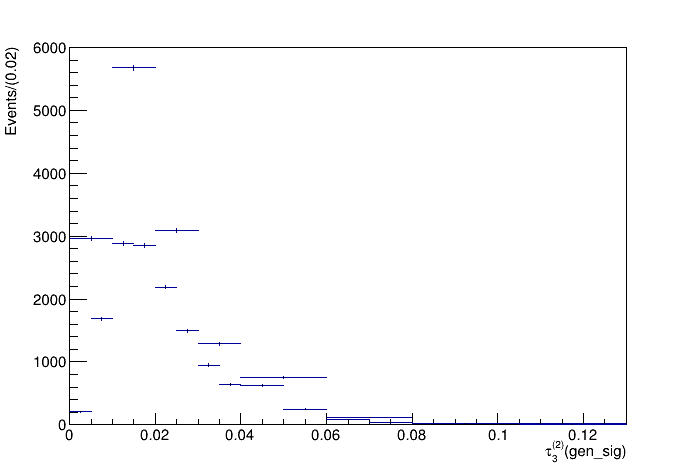

In [86]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
histMgenMC_sig.Draw("e")
histMdetMC_sig.Draw("e same")
c1.Draw()

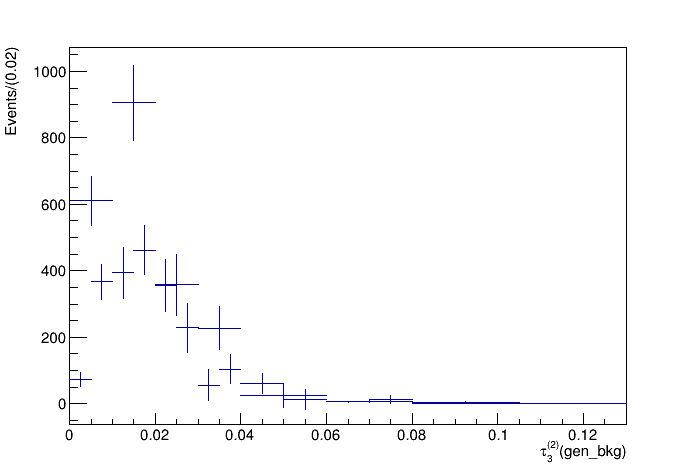

In [87]:
c1 = ROOT.TCanvas("chistMgenMC_bkg1", "chistMgenMC_bkg1")
histMgenMC_bkg.Draw("e")
histMdetMC_bkg.Draw("e same")
c1.Draw()

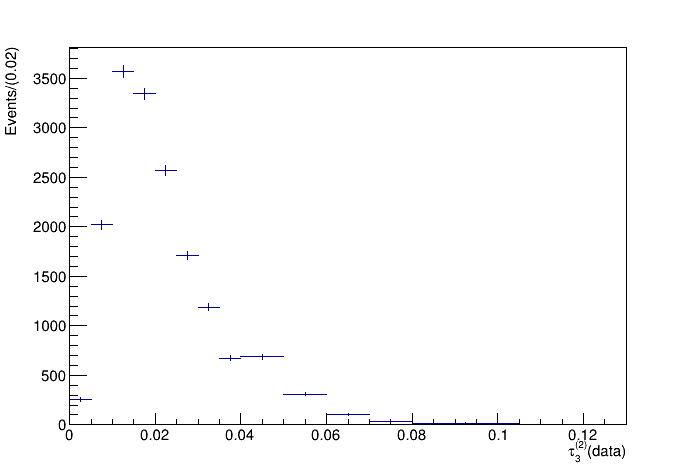

In [88]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
#histMgenData.Draw("e")
histMdetData.Draw("e ")
c1.Draw()

### Fill response matrix

In [89]:
response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
hist2Dfill = np.zeros((MC_sig_reco_tau3_2.shape[0], 2))
hist2Dfill[:,0] = MC_sig_reco_tau3_2.flatten()
hist2Dfill[:,1] = MC_sig_gen_tau3_2.flatten()
fill_hist(response, hist2Dfill, weights_MC_sig)
response.SetTitle("Nominal Response Matrix;#tau_{3}^{(2)}(det_sig);#tau_{3}^{(2)}(gen_sig)")

Warning in <TROOT::Append>: Replacing existing TH1: response (Potential memory leak).


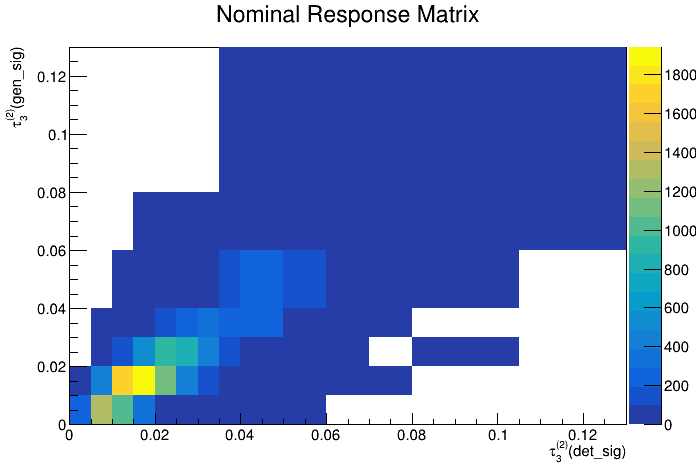

In [90]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

### Purity and Stability calculation

In [92]:
hMC_gen_bkg = ROOT.TH1D(histMgenMC_bkg)
#hMC_gen_bkg.Scale(1./norm_genMC_bkg)

hMC_reco_bkg = ROOT.TH1D(histMdetMC_bkg)
#hMC_reco_bkg.Scale(1./norm_recoMC_bkg)

hMC_gen_sig = ROOT.TH1D(histMgenMC_sig)
#hMC_gen_sig.Scale(1./norm_genMC_sig)

hMC_reco_sig = ROOT.TH1D(histMdetMC_sig)
#hMC_reco_sig.Scale(1./norm_recoMC_sig)

hMC_data = ROOT.TH1D(histMdetData)
#histMgenData.Scale(1./norm_genData)
#histMdetData.Scale(1./norm_detData)

'''
histMgenMC_bkg.Scale(1./norm_genMC_bkg)
histMdetMC_bkg.Scale(1./norm_recoMC_bkg)
histMgenMC_sig.Scale(1./norm_genMC_sig)
histMdetMC_sig.Scale(1./norm_recoMC_sig)

#histMgenData.Scale(1./norm_genData)
histMdetData.Scale(1./norm_detData)
''';

In [93]:
for i in xrange(0, histMdetMC_sig.GetNbinsX()+1):
    print i, hMC_reco_sig.GetBinLowEdge(i), hMC_reco_sig.GetBinContent(i)   
print "=========="
for i in xrange(0, hMC_gen_sig.GetNbinsX()+1):
    print i, hMC_gen_sig.GetBinLowEdge(i), hMC_gen_sig.GetBinContent(i)

0 -0.00928571428571 0.0
1 0.0 208.420559367
2 0.005 1685.2170352
3 0.01 2887.73560238
4 0.015 2848.88002541
5 0.02 2191.49498388
6 0.025 1494.28255834
7 0.03 950.689129518
8 0.035 635.024276717
9 0.04 620.660694944
10 0.05 246.347233523
11 0.06 86.4933249761
12 0.07 29.502479448
13 0.08 15.5470259518
14 0.105 0.842699659694
0 -0.0185714285714 0.0
1 0.0 2969.51051942
2 0.01 5674.64491062
3 0.02 3086.64207304
4 0.03 1288.68631693
5 0.04 747.965138792
6 0.06 115.736857367
7 0.08 17.9518131355


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cresponse1


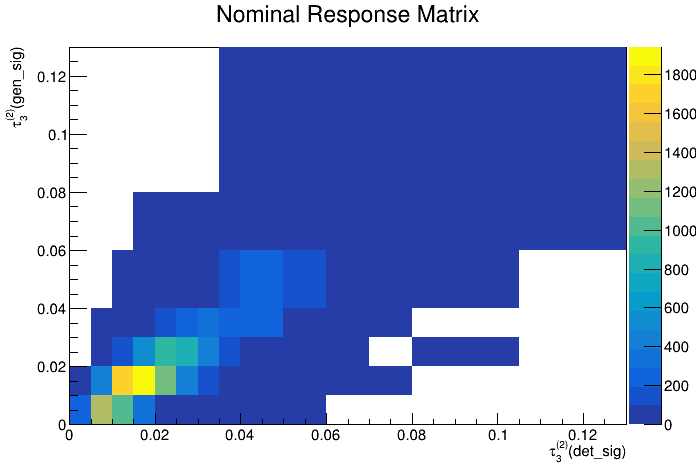

In [94]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [95]:
purity = ROOT.TH1D("purity", "Purity and stability study; #tau_{3}^{(2)}; ",  gen_bins.shape[0]-1, (gen_bins))
stability = ROOT.TH1D("stability", "Purity and stability study; #tau_{3}^{(2)}; ",  gen_bins.shape[0]-1, (gen_bins))
efficiency = ROOT.TH1D("efficiency", "Purity and stability study; #tau_{3}^{(2)}; ",  gen_bins.shape[0]-1, (gen_bins))

Warning in <TROOT::Append>: Replacing existing TH1: purity (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: stability (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: efficiency (Potential memory leak).


### With python

We define purity as the fraction of reconstructed events that are generated in the same bin, 
and stability as the fraction of generated events that are reconstructed in the same
bin, divided by the overall reconstruction efficiency per bin. 

In [96]:
gen_arr = MC_sig_gen_tau3_2[:]
#print gen_arr[0:20]
#print gen_bins[0:-1]
gen_bin_index = np.digitize(gen_arr, gen_bins)
print gen_bin_index
#print gen_bin_index[0:20]

det_arr = MC_sig_reco_tau3_2[0:]
#print det_arr[0:20]
#print det_bins[0:-1]
det_bin_index = np.digitize(det_arr, gen_bins)
det_bin_index2 = np.digitize(det_arr, det_bins)
#print det_bin_index[0:20]

ndet_pergenbin = [0.] #N_recgen array = number of events generated in and reconstructed in gen bin i
ndet_genanywhere = [0.] # number of events reconstructed in gen _bin i but generated anywhere
ngen_detanywhere = [0.] # number of events generated in gen _bin i but reconstructed anywhere

### purity = # of evts generated and reconstructed in gen bin i / # of evts reconstructed in gen bin i but generated anywhere
### stability = # of evts generated and reconstructed in gen bin / # of evts generated in gen bin i but reconstructed anywhere
for i in xrange(0, gen_bins.shape[0]-1):
    
    #print i+1
    
    for k in xrange(0, gen_bin_index.shape[0]):
        
        if gen_bin_index[k]==i+1: 
            ngen_detanywhere[i]+=1 #stability denominator
            if det_bin_index[k]==i+1: ndet_pergenbin[i]+=1
            
    ngen_detanywhere.append(0.)
    ndet_pergenbin.append(0.)
    
    for k in xrange(0, det_bin_index.shape[0]):
        
        if det_bin_index[k]==i+1: 
            ndet_genanywhere[i]+=1 #purity denominator
            
    ndet_genanywhere.append(0.)
    
    print "Setting contents for P, S, eff. histos, in bin %d"%(i+1)
    purity.SetBinContent(i+1, ndet_pergenbin[i]/ndet_genanywhere[i])
    stability.SetBinContent(i+1, ndet_pergenbin[i]/ngen_detanywhere[i])
    efficiency.SetBinContent(i+1, ndet_pergenbin[i]/43107.)
    
    
ndet_pergenbin = np.array(ndet_pergenbin)
ndet_genanywhere = np.array(ndet_genanywhere)
ngen_detanywhere = np.array(ngen_detanywhere)

print "\n\n+++++++++Pure and Stable! :)+++++++++++++\n\n"
print ndet_pergenbin,"\n"
print ndet_genanywhere,"\n"
purity_arr = ndet_pergenbin/ndet_genanywhere
print "Purity array:", purity_arr[:-1], "\n\n"

print ndet_pergenbin,"\n"
print ngen_detanywhere,"\n"
stability_arr = ndet_pergenbin/ngen_detanywhere
print "Stability array:", stability_arr[:-1], "\n\n"

print "+++++Efficiency+++++\n"
efficiency_arr = ndet_pergenbin/np.sum(ngen_detanywhere)
print "Efficiency array:", efficiency_arr[:-1]

[1 2 3 ... 2 1 5]
Setting contents for P, S, eff. histos, in bin 1
Setting contents for P, S, eff. histos, in bin 2
Setting contents for P, S, eff. histos, in bin 3
Setting contents for P, S, eff. histos, in bin 4
Setting contents for P, S, eff. histos, in bin 5
Setting contents for P, S, eff. histos, in bin 6
Setting contents for P, S, eff. histos, in bin 7


+++++++++Pure and Stable! :)+++++++++++++


[ 4497. 11155.  5117.  1787.  1269.   136.    23.     0.] 

[ 5870. 17867. 11383.  4915.  2653.   368.    51.     0.] 

Purity array: [0.76609881 0.62433537 0.44953    0.36358087 0.47832642 0.36956522
 0.45098039] 


[ 4497. 11155.  5117.  1787.  1269.   136.    23.     0.] 

[ 9244. 17660.  9523.  3963.  2299.   361.    57.     0.] 

Stability array: [0.48647772 0.63165345 0.53733067 0.45092102 0.55197912 0.3767313
 0.40350877] 


+++++Efficiency+++++

Efficiency array: [0.1043218  0.25877468 0.11870462 0.04145498 0.02943837 0.00315494
 0.00053356]


/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in divide
/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in divide


In [97]:
ROOT.gStyle.SetOptStat(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: pse_ttbar


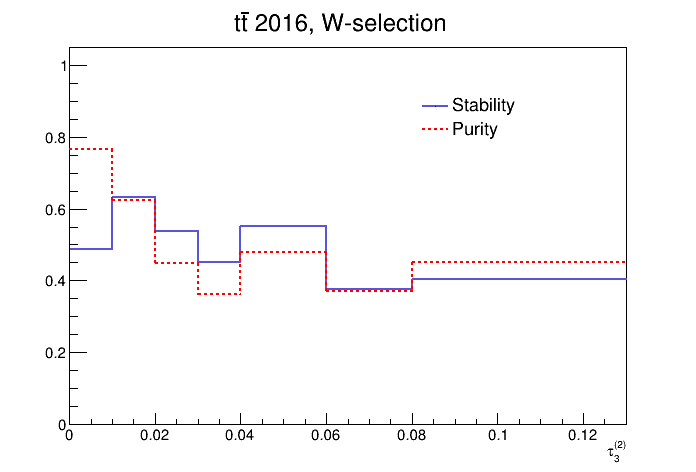

In [98]:
cpse = ROOT.TCanvas("pse_ttbar", "pse_ttbar")

purity.SetLineColor(ROOT.kRed)
purity.SetLineWidth(2)
purity.SetLineStyle(2)
purity.SetMinimum(0.)
purity.SetMaximum(1.05)

stability.SetLineColor(9)
stability.SetLineWidth(2)
stability.SetLineStyle(1)
stability.SetMinimum(0.)
stability.SetMaximum(1.05)
stability.SetTitle("t#bar{t} 2016, W-selection ")
stability.Draw("hist")
purity.Draw("hist same")
#efficiency.Draw("same")

leg0 = ROOT.TLegend(0.6, 0.7, 0.8, 0.8)
leg0.AddEntry( stability, "Stability ")
leg0.AddEntry( purity, "Purity ")
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
#hs.Draw("nostack")
leg0.Draw()

ROOT.gStyle.SetOptStat(0)
cpse.Draw()

(array([[4.4970e+03, 1.3080e+03, 0.0000e+00, 5.7000e+01, 0.0000e+00,
         8.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.3970e+03, 1.1155e+04, 0.0000e+00, 2.0480e+03, 0.0000e+00,
         2.2100e+02, 4.4000e+01, 0.0000e+00, 2.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.1100e+02, 4.6270e+03, 0.0000e+00, 5.1170e+03, 0.0000e+00,
         1.1130e+03, 2.0500e+02, 0.0000e+00, 1.0000e+01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.3000e+01, 5.0500e+02, 0.0000e+00, 1.9530e+03, 0.0000e+00,
         1.7870e+03, 6.1300e+02, 0.0000e+00, 2.3000e+01, 1.0000e+00],
        [6.0000e+00, 6.2000e+01, 0.0000e+00, 3.4000e+02, 0.0000e+00,
         8.0200e+02, 1.2690e+03, 0.0000e+00, 1.6800e+02, 6.0000e+00],
        [0.0000e+00, 0.0000

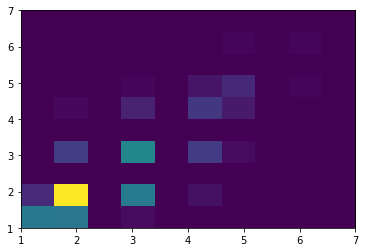

In [99]:
plt.hist2d(x=det_bin_index, y=gen_bin_index)

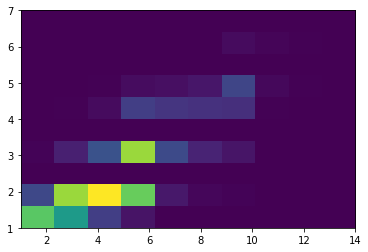

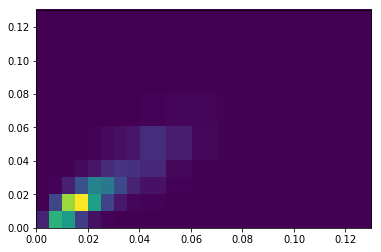

In [100]:
plt.hist2d(x=det_bin_index2, y=gen_bin_index)
plt.show()
plt.hist2d(x=MC_sig_reco_tau3_2, y=MC_sig_gen_tau3_2, bins=[det_bins, gen_bins])
plt.show()

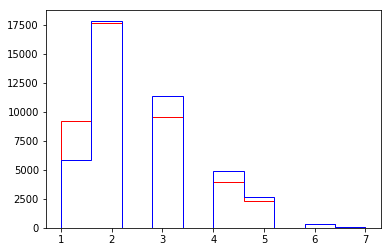

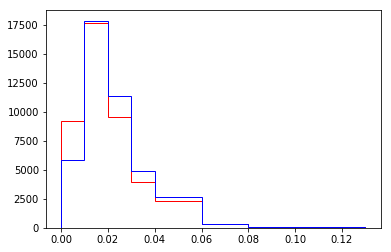

In [101]:
plt.hist(gen_bin_index, histtype='step', color='r')
plt.hist(det_bin_index, histtype='step', color='b')
plt.show()

plt.hist(MC_sig_gen_tau3_2, histtype='step', color='r', bins=gen_bins)
plt.hist(MC_sig_reco_tau3_2, histtype='step', color='b', bins=gen_bins)
plt.show()

### with root

In [102]:
ps_bindex = 0 

l = 1

tot_col = [] #np.array([0. for i in xrange(0, purity.GetNbinsX()+1)]) #
#tot_col_err = [] #0 

tot_row = np.array([0. for i in xrange(1, purity.GetNbinsX()+1)])
#tot_row_err = np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])

diag = [] #np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])
#diag_error = [] # np.zeros_like([0. for i in xrange(1, purity.GetNbinsX()+1)])

for i in range(0, response.GetNbinsY()+1):    
    
    k = 0
    col = 0.
    d_jj = 0.
    for j in range(1, response.GetNbinsX()+1):
    
        r_ij = response.GetBinContent(i,j)
        #r_ij_err = response.GetBinError(i,j)
        #print (i,j), r_ij
        
        if (j)%2==0 and j < (response.GetNbinsX()+1):
            #since 2 reco bins per 1 gen bin
            print "Filling row index k={} with elements (i,j)=({},{})".format(k,i,j)
            tot_row[k] += r_ij
            print "Filling row index k={} with elements (i,j)=({},{})".format(k,i,j+1)
            tot_row[k] +=  response.GetBinContent(i,j+1)
            
            #tot_col_err[k] += response.GetBinError(i,j)
            #tot_col_err[k] +=  response.GetBinError(i,j+1)
            
            k +=1
        
        col += r_ij
        
        if l==j:
            print "Adding content (equal to {}) of bin i={}, j={} to Diagonal".format(r_ij, i,j), l
            d_jj += r_ij
 
            print "Adding content (equal to {}) of bin i={}, j={} to Diagonal".format( response.GetBinContent(i,j+1), i,j+1), l
            d_jj += response.GetBinContent(i,j+1)

            diag.append(d_jj)
    l = l+2
    print col, d_jj

Adding content (equal to 0.0) of bin i=0, j=1 to Diagonal 1
Adding content (equal to 0.0) of bin i=0, j=2 to Diagonal 1
Filling row index k=0 with elements (i,j)=(0,2)
Filling row index k=0 with elements (i,j)=(0,3)
Filling row index k=1 with elements (i,j)=(0,4)
Filling row index k=1 with elements (i,j)=(0,5)
Filling row index k=2 with elements (i,j)=(0,6)
Filling row index k=2 with elements (i,j)=(0,7)
Filling row index k=3 with elements (i,j)=(0,8)
Filling row index k=3 with elements (i,j)=(0,9)
Filling row index k=4 with elements (i,j)=(0,10)
Filling row index k=4 with elements (i,j)=(0,11)
Filling row index k=5 with elements (i,j)=(0,12)
Filling row index k=5 with elements (i,j)=(0,13)
Filling row index k=6 with elements (i,j)=(0,14)
Filling row index k=6 with elements (i,j)=(0,15)
0.0 0.0
Filling row index k=0 with elements (i,j)=(1,2)
Filling row index k=0 with elements (i,j)=(1,3)
Adding content (equal to 0.0) of bin i=1, j=3 to Diagonal 3
Adding content (equal to 0.0) of bin i

In [103]:
print diag
print tot_row
print diag/tot_row

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[8.40157910e+03 8.94728218e+02 6.47923250e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[ 0.  0.  0. nan nan nan nan]


/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
purity_reco_binning = [0] 
diag = 0
for i in range(1, response.GetNbinsX()+1):
    for j in range(1, response.GetNbinsY()+1):
        dval = response.GetBinContent(i,j)
        if i==j:
            diag = diag+dval
            print i, j, 
            if i==0 and j==0: purity_reco_binning[0] = dval/
            else: purity_reco_binning.append()
        j = j+2

SyntaxError: invalid syntax (<ipython-input-104-dc72c7765764>, line 9)

### Unfolding 

In [105]:
print 'getting tunfolder:'

orientation = ROOT.TUnfoldDensity.kHistMapOutputHoriz
regMode = ROOT.TUnfoldDensity.kRegModeCurvature
con = ROOT.TUnfoldDensity.kEConstraintNone
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
errmode = ROOT.TUnfoldSys.kSysErrModeMatrix
#tunfolder_MC = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")
#tunfolder_data = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")

tunfolder_MC = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)
tunfolder_data = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 14 input bins and 7 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{3}^{(2)}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #8 (yaxis:#tau_{3}^{(2)}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]
Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 14 input bins and 7 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{3}^{(2)}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #8 (yaxis:#tau_{3}^{(2)}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB

Set the input, a 1D reconstructed histogram from either MC_sig (closure) or Data (measurement) , binned in the detector level binning. Subtract background contributions from data, using reco-MC bkg.

In [106]:
print 'setting reco input'
tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco input


In [107]:
print 'setting reco MC input'
tunfolder_MC.SetInput( histMdetMC_sig )
#tunfolder_MC.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco MC input


0

In [108]:
unfolded_data = tunfolder_data.DoUnfold(0.)
unfolded_data = tunfolder_data.GetOutput("unfolded_data")

unfolded_MC = tunfolder_MC.DoUnfold(0.)
unfolded_MC = tunfolder_MC.GetOutput("unfolded_MC")

Warning in <TROOT::Append>: Replacing existing TH1: unfolded_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: unfolded_MC (Potential memory leak).


In [109]:
ROOT.gStyle.SetOptStat(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Info in <TCanvas::Print>: png file tau3_2_unfolding_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file tau3_2_unfolding_Escheme_bkgsub.pdf has been created


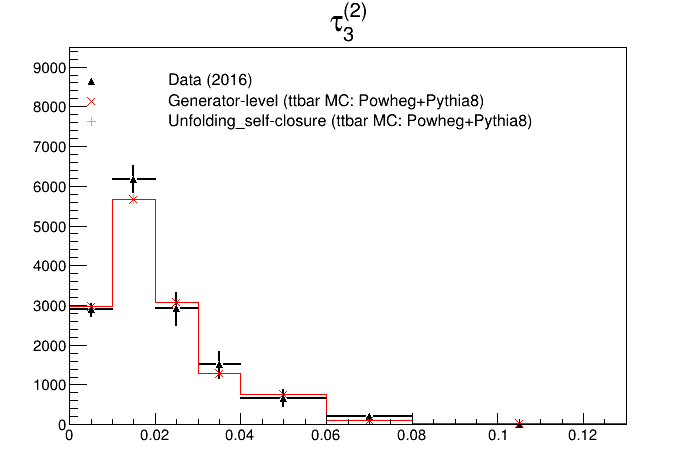

In [110]:
c5 = ROOT.TCanvas('c5', 'c5')

unfolded_MC.SetMarkerStyle(2)
unfolded_MC.SetMarkerColor(7)
unfolded_MC.SetLineColor(7)
unfolded_MC.SetLineWidth(1)

unfolded_data.SetMarkerStyle(22)
unfolded_data.SetMarkerColor(1)
unfolded_data.SetLineColor(1)
unfolded_data.SetLineWidth(2)


#unfolded_MC.SetFillColor(0)
#histMgenData.SetMarkerStyle(4)
#histMgenData.SetMarkerColor(2)
#histMgenData.SetOption("E")
#histMgenData.SetLineColor(2)
histMgenMC_sig.SetMarkerStyle(5)
histMgenMC_sig.SetMarkerColor(2)
histMgenMC_sig.SetLineColor(2)



hs = ROOT.THStack("#tau_{3}^{(2)}", "#tau_{3}^{(2)}")
#hs.Add
#hs.SetMinimum(0)
hs.SetMaximum(9500)
#hs.Add( histMgenData, "E HIST")
hs.Add( unfolded_MC, "E HIST")
hs.Add( unfolded_data, "E ")
hs.Add(histMgenMC_sig, "E HIST")
#hs.Add(histMdetMC_sig, "E")
#hs.Add(histMdetData, "E")

leg0 = ROOT.TLegend(0.02, 0.72, 0.91, 0.85)
leg0.AddEntry( unfolded_data, "Data (2016)", 'p')
leg0.AddEntry( histMgenMC_sig, "Generator-level (ttbar MC: Powheg+Pythia8)", 'p')
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.AddEntry( unfolded_MC, "Unfolding_self-closure (ttbar MC: Powheg+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
hs.Draw("nostack")
leg0.Draw()

c5.Draw()
c5.SaveAs("tau3_2_unfolding_Escheme_bkgsub.png")
c5.SaveAs("tau3_2_unfolding_Escheme_bkgsub.pdf")

In [111]:
ratio = ROOT.TH1D("","; #tau_{3}^{(2)}",  gen_bins.shape[0]-1, (gen_bins))
ratio.GetXaxis().SetTitle("#tau_{3}^{(2)}");
#ratio.GetYaxis().SetTitleOffset(0.);
ratio.GetYaxis().CenterTitle(ROOT.kTRUE);
ratio.GetXaxis().CenterTitle(ROOT.kTRUE);
ratio.GetYaxis().SetRangeUser(0.7,1.3)
ratio.Add(unfolded_MC)
ratio.GetYaxis().SetTitle("#frac{Unfolded Powheg}{Gen-level Powheg}")
ratio.Sumw2()
ratio.SetStats(0)
ratio.Divide(histMgenMC_sig);
ratio.GetYaxis().SetLabelSize(0.09)
ratio.GetXaxis().SetLabelSize(0.09)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.12)
ratio.GetYaxis().SetTitleOffset(0.4)
ratio.GetXaxis().SetTitleSize(0.12)
ratio.GetXaxis().SetTitleOffset(0.85)

print "Bin Content", "\t", "Bin error", "\t", "Bin Center", "\t", "Bin Low-Edge", "\t", "Ratio to Truth for bin", "\t", "Ratio Error"
for i in xrange(1,gen_bins.shape[0]):
    print "%0.4f"%unfolded_MC.GetBinContent(i), "\t", "%0.4f"%unfolded_MC.GetBinError(i), "\t", unfolded_MC.GetBinCenter(i), "\t", unfolded_MC.GetBinLowEdge(i), "%0.4f"%ratio.GetBinContent(i), "%0.4f"%ratio.GetBinError(i)

Bin Content 	Bin error 	Bin Center 	Bin Low-Edge 	Ratio to Truth for bin 	Ratio Error
2969.5105 	57.3425 	0.005 	0.0 1.0000 0.0222
5674.6449 	109.3061 	0.015 	0.01 1.0000 0.0208
3086.6421 	122.9660 	0.025 	0.02 1.0000 0.0412
1288.6863 	104.4149 	0.035 	0.03 1.0000 0.0827
747.9651 	71.2641 	0.05 	0.04 1.0000 0.0977
115.7369 	34.4604 	0.07 	0.06 1.0000 0.3028
17.9518 	9.1731 	0.105 	0.08 1.0000 0.5293


Info in <TCanvas::Print>: png file tau_3_2_MC_SC_ratio_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file tau_3_2_MC_SC_ratio_Escheme_bkgsub.pdf has been created


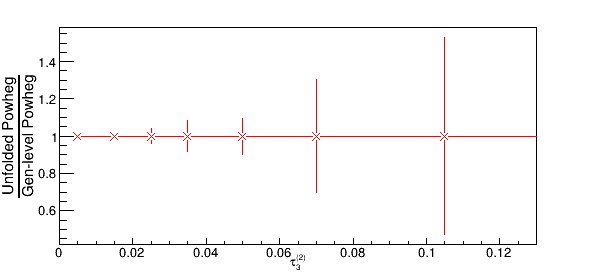

In [112]:
c6 = ROOT.TCanvas("c6","c6", 600,300)
ratio.GetYaxis().SetLabelSize(0.05)
ratio.GetXaxis().SetLabelSize(0.05)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerStyle(5)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.06)
ratio.GetYaxis().SetTitleOffset(0.7)
ratio.GetXaxis().SetTitleSize(0.05)
ratio.GetXaxis().SetTitleOffset(0.8)
#ratio.SetMinimum(0.7)
#ratio.SetMaximum(1.3)
#ratio.SetMarkerStyle(21);
ratio.Draw("ep")
c6.Draw()
c6.SaveAs("tau_3_2_MC_SC_ratio_Escheme_bkgsub.png")
c6.SaveAs("tau_3_2_MC_SC_ratio_Escheme_bkgsub.pdf")

In [113]:
# get unfolding output
# includes the statistical and background errors
# but not the other systematic uncertainties
#tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

histUnfoldOutput= tunfolder_data.GetOutput("unfolded_data")

# retreive error matrix of statistical errors
histEmatStat=tunfolder_data.GetEmatrixInput("unfolding stat error matrix");
# retreive full error matrix
# This includes all systematic errors
histEmatTotal=tunfolder_data.GetEmatrixTotal("unfolding total error matrix");
# create two copies of the unfolded data, one with statistical errors
# the other with total errors
histUnfoldStat=ROOT.TH1D("tau3_2(unfold,staterr)",";tau3_2(gen)",  gen_bins.shape[0]-1, (gen_bins));
histUnfoldTotal=ROOT.TH1D("tau3_2(unfold,totalerr)",";tau3_2(gen)",  gen_bins.shape[0]-1, (gen_bins));

for i in xrange(0, gen_bins.shape[0]): 
    c=histUnfoldOutput.GetBinContent(i);
    # histogram with unfolded data and stat errors
    histUnfoldStat.SetBinContent(i,c);
    histUnfoldStat.SetBinError(i,np.sqrt(histEmatStat.GetBinContent(i,i)));
    # histogram with unfolded data and total errors
    histUnfoldTotal.SetBinContent(i,c);
    histUnfoldTotal.SetBinError(i,np.sqrt(histEmatTotal.GetBinContent(i,i)));

# create histogram with correlation matrix
histCorr=ROOT.TH2D("Corr(total)",";tau3_2(gen);tau3_2(gen)",  gen_bins.shape[0]-1, (gen_bins), gen_bins.shape[0]-1, (gen_bins));
for i in xrange(0, gen_bins.shape[0]): 
    ei,ej = 0,0
    ei=np.sqrt(histEmatTotal.GetBinContent(i,i));
    if(ei<=0.0): continue
    for j in xrange(0, gen_bins.shape[0]):
        ej=np.sqrt(histEmatTotal.GetBinContent(j,j));
        if(ej<=0.0): continue
        histCorr.SetBinContent(i,j,histEmatTotal.GetBinContent(i,j)/ei/ej);

# retreive bgr source 1
#histdetNormBgr1=tunfolder_data.GetBackground("bgr1 normalized", "background1");
histMdetNormBgrTotal=tunfolder_data.GetBackground("bkg_all");
#========================


Error in <TUnfoldDensity::SubtractBackground>: Source bkg_all given twice, ignoring 2nd call.

Warning in <TROOT::Append>: Replacing existing TH1: unfolded_data (Potential memory leak).


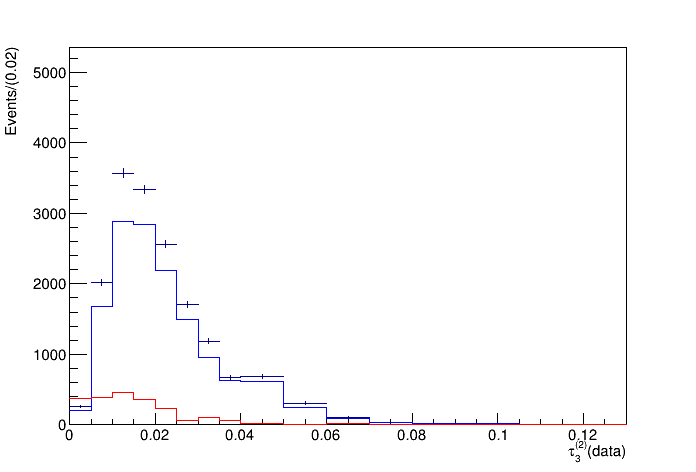

In [114]:
# Step 7: plots
output = ROOT.TCanvas();
#output.Divide(3,2);
#output.cd(1);
# data, MC prediction, background
#histMdetData.SetMinimum(0.0);
histMdetData.SetMaximum(histMdetData.GetMaximum()*1.5);
histMdetData.Draw("E");
#histMdetMC_sig.SetMinimum(0.0);
histMdetMC_sig.SetLineColor(ROOT.kBlue);
histMdetNormBgrTotal.SetLineColor(ROOT.kRed);
#histdetNormBgr1.SetLineColor(ROOT.kCyan);
histMdetMC_sig.Draw("SAME HIST");
#histdetNormBgr1.Draw("SAME HIST");
histMdetNormBgrTotal.Draw("SAME HIST");
output.Draw()

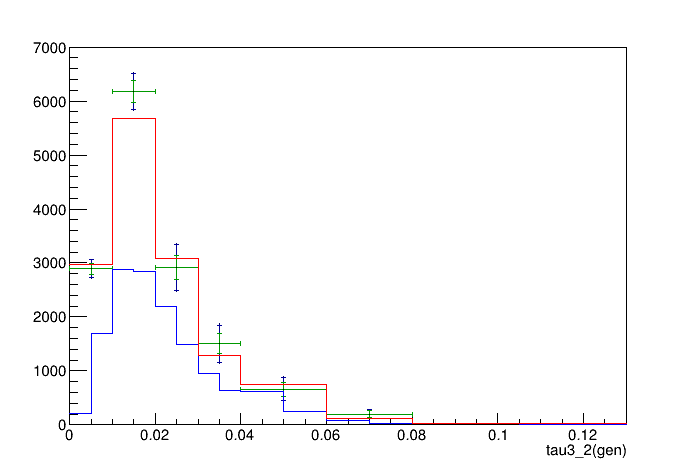

In [115]:
#output.cd(2)
# unfolded data, data truth, MC truth
output = ROOT.TCanvas();
histUnfoldTotal.SetMinimum(0.0);
histUnfoldTotal.SetMaximum(7000);
histUnfoldTotal.SetLineColor(ROOT.kBlue+3)
histUnfoldTotal.SetLineWidth(1)
# outer error: total error
histUnfoldTotal.Draw("E");
# middle error: stat+bgr
histUnfoldOutput.SetLineWidth(1)
histUnfoldOutput.Draw("SAME E1");
# inner error: stat only
histUnfoldStat.SetLineColor(ROOT.kGreen+2)
histUnfoldStat.Draw("SAME E1");

histMdetMC_sig.Draw("SAME HIST");
histMgenMC_sig.Draw("SAME HIST");
#histBbbSignalGen.SetLineColor(ROOT.kBlue);
#histBbbSignalGen.Draw("SAME HIST");
output.Draw()

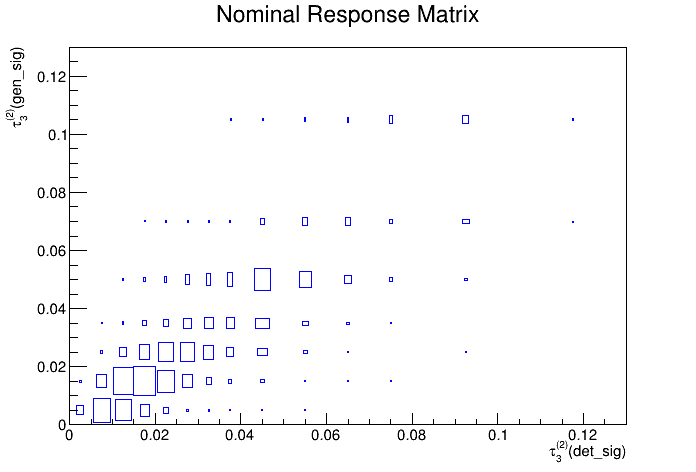

In [116]:
output.cd(3);
# unfolding matrix
response.SetLineColor(ROOT.kBlue);
response.Draw("BOX");

output.Draw()

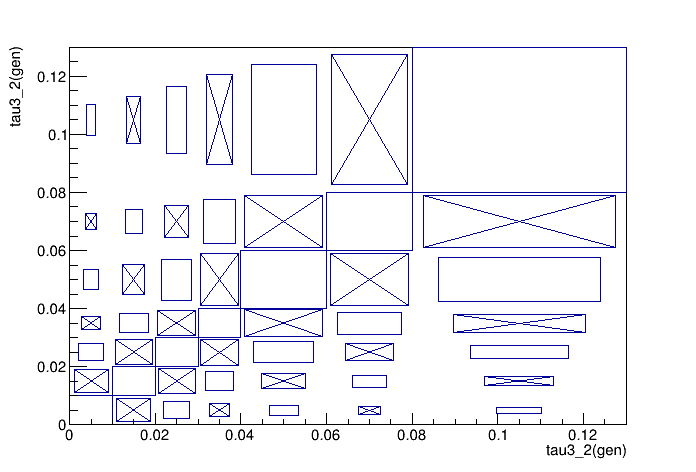

In [117]:
# show tau as a function of chi**2
output.cd(4);
#logTauX.Draw();
#bestLogTauLogChi2.SetMarkerColor(ROOT.kRed);
#bestLogTauLogChi2.Draw("*");
# show the L curve
output.cd(5);
#lCurve.Draw("AL");
#bestLcurve.SetMarkerColor(ROOT.kRed);
#bestLcurve.Draw("*");
# show correlation matrix
output.cd(6);
histCorr.Draw("BOX");
output.Draw()